# **EDA AND DATA CLEANING NOTEBOOK**

## Objectives

* Carry Out EDA relating to quality of data
* Clean data and save for use in further analysis

## Inputs

* **Raw Dataset:** inputs/datasets/raw/hotel_bookings.csv

## Outputs

* **Cleaned Dataset:** outputs/datasets/collection/cleaned/cleaned.csv

---

# Import Packages and Load Data

Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load data

In [2]:
from pathlib import Path

project_root = Path.cwd().parent
dataset_file = project_root / 'inputs' / 'datasets' / 'raw' / 'hotel_bookings.csv'
df = pd.read_csv(dataset_file)
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


---

# Convert Data Types

View current data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Convert data types ready for profiling report.
- `Int64` allows for the missing values and is used for `children`, `agent` and `company` to remove decimal digits before converting to `category` type

In [4]:
df['hotel'] = df['hotel'].astype('category')
df['is_canceled'] = df['is_canceled'].astype('bool')
df['arrival_date_year'] = df['arrival_date_year'].astype('category')
df['arrival_date_month'] = df['arrival_date_month'].astype('category')
df['children'] = df['children'].astype('Int64')
df['meal'] = df['meal'].astype('category')
df['country'] = df['country'].astype('category')
df['market_segment'] = df['market_segment'].astype('category')
df['distribution_channel'] = df['distribution_channel'].astype('category')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('bool')
df['reserved_room_type'] = df['reserved_room_type'].astype('category')
df['assigned_room_type'] = df['assigned_room_type'].astype('category')
df['deposit_type'] = df['deposit_type'].astype('category')
df['agent'] = df['agent'].astype('Int64').astype('category')
df['company'] = df['company'].astype('Int64').astype('category')
df['customer_type'] = df['customer_type'].astype('category')
df['reservation_status'] = df['reservation_status'].astype('category')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  bool          
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  category      
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  Int64  

# Profile Report

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df.drop_duplicates(), title="Hotel Bookings Profile Report", minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:00<00:00, 87.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The Profile Report alerts us to some possible data issues which require further exploration:
- **Data Ranges:**
  - `lead_time` shows two values over 600
  - `stays_in_weekend_nights` shows some values over 10
  - `stays_in_week_nights` shows some values over 30
  - `adults` shows some values over 20
  - `children` shows a high value of 10
  - `babies` shows high values of 9 and 10
  - `previous_cancellations` shows values over 20
  - `previous_bookings_not_canceled` shows values over 60
  - `booking_changes` shows values over 20
  - `days_in_waiting_list` shows values over 300
  - `adr` shows at least one negative value, many zero values and an incredibly high value of 5400
  - `required_car_parking_spaces` shows a high value of 8
- **Undefined Values for Categorical Variables:**
  - there are 'Undefined' values for `meal`, `market_segment`, `distribution_channel`
- **Missing Values**
  - there are missing values for `children`, `country`, `agent` and `company`

---

# Explore Statistical Outliers

## Functions to assist analysis

Define function for summarising value counts and percentages in a table

In [6]:
def value_counts_and_percentages(df, filter_by_cols=None):
    data = df[filter_by_cols] if filter_by_cols else df
    df_count = data.value_counts(dropna=False)
    df_percent = round(data.value_counts(normalize=True, dropna=False) * 100, 1)
    summary = pd.concat([df_count, df_percent], axis=1)
    summary.columns = ['Count', '%']
    return summary

def plot_categorical_facets(data, x, facet_by, xlim=None):
    g = sns.catplot(data=data, x=x, kind="count", col=facet_by, col_wrap=2, sharey=False, hue=x, legend=False)
    for ax in g.axes.flatten():
        plt.setp(ax.get_xticklabels(), rotation=90)
    if xlim:
        plt.xlim(xlim)
    plt.show()

## Remove 'Undefined' Values

### Meal

View categories

In [7]:
summary = value_counts_and_percentages(df, ['meal'])
summary

,Count,%
meal,,
BB,92310,77.3
HB,14463,12.1
SC,10650,8.9
Undefined,1169,1.0
FB,798,0.7


Drop 'Undefined'

In [8]:
# Drop rows with values of 'Undefined'
condition = (df['meal'] == 'Undefined')
df = df[~condition]

# Remove 'Undefined' as a category
df['meal'] = df['meal'].cat.remove_categories(['Undefined'])

# Check values have been dropped
summary = value_counts_and_percentages(df, ['meal'])
summary

,Count,%
meal,,
BB,92310,78.1
HB,14463,12.2
SC,10650,9.0
FB,798,0.7


### Market Segment

View categories

In [9]:
summary = value_counts_and_percentages(df, ['market_segment'])
summary

,Count,%
market_segment,,
Online TA,56461,47.8
Offline TA/TO,23961,20.3
Groups,19010,16.1
Direct,12533,10.6
Corporate,5280,4.5
Complementary,737,0.6
Aviation,237,0.2
Undefined,2,0.0


Drop 'Undefined'

In [10]:
# Drop rows with values of 'Undefined'
condition = (df['market_segment'] == 'Undefined')
df = df[~condition]

# Remove 'Undefined' as a category
df['market_segment'] = df['market_segment'].cat.remove_categories(['Undefined'])

# Check values have been dropped
summary = value_counts_and_percentages(df, ['market_segment'])
summary

,Count,%
market_segment,,
Online TA,56461,47.8
Offline TA/TO,23961,20.3
Groups,19010,16.1
Direct,12533,10.6
Corporate,5280,4.5
Complementary,737,0.6
Aviation,237,0.2


### Distribution Channel

View categories

In [11]:
summary = value_counts_and_percentages(df, ['distribution_channel'])
summary

,Count,%
distribution_channel,,
TA/TO,97021,82.1
Direct,14372,12.2
Corporate,6630,5.6
GDS,193,0.2
Undefined,3,0.0


Drop 'Undefined'

In [12]:
# Drop rows with values of 'Undefined'
condition = (df['distribution_channel'] == 'Undefined')
df = df[~condition]

# Remove 'Undefined' as a category
df['distribution_channel'] = df['distribution_channel'].cat.remove_categories(['Undefined'])

# Check values have been dropped
summary = value_counts_and_percentages(df, ['distribution_channel'])
summary

,Count,%
distribution_channel,,
TA/TO,97021,82.1
Direct,14372,12.2
Corporate,6630,5.6
GDS,193,0.2


## Lead Time

Show distribution

<Axes: xlabel='lead_time', ylabel='Count'>

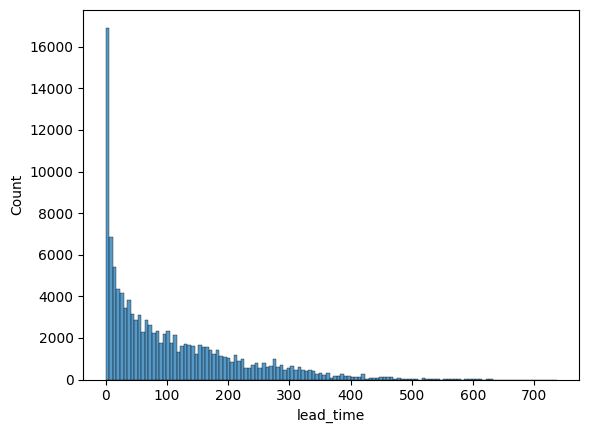

In [13]:
sns.histplot(df, x='lead_time')

Analyse values over 600

In [14]:
cols = ['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'meal', 'market_segment', 'distribution_channel', 'agent', 'company','is_repeated_guest',
        'reserved_room_type','assigned_room_type', 'deposit_type', 'days_in_waiting_list',
        'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']
cols = df.columns
data = df[df['lead_time'] > 600][cols].value_counts(dropna=False)
pd.DataFrame(data)

count
hotel        is_canceled lead_time arrival_date_year arrival_date_month arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights adults children babies meal country market_segment distribution_channel is_repeated_guest previous_cancellations previous_bookings_not_canceled reserved_room_type assigned_room_type booking_changes deposit_type agent company days_in_waiting_list customer_type adr  required_car_parking_spaces total_of_special_requests reservation_status reservation_status_date       
City Hotel   True        605       2016              October            43                       17                        1                       2                    2      0        0      BB   PRT     Groups         TA/TO                False             0                      0                              A                  A                  0               Non Refund   1     NaN     0                    Transient     60.0 0                           0                         Canceled           2016-09-20                  30
                         626       2016              November           46                       7                         1                       2                    2      0        0      BB   PRT     Groups         TA/TO                False             0                      0                              A                  A                  0               Non Refund   1     NaN     0                    Transient     62.8 0                           0                         Canceled           2016-09-26                  30
                         608       2017              March              10                       9                         0                       2                    2      0        0      BB   PRT     Groups         TA/TO                False             0                      0                              A                  A                  0               Non Refund   1     NaN     0                    Transient     62.0 0                           0                         Canceled           2015-10-21                  15
                         622       2017              March              12                       23                        0                       2                    2      0        0      BB   PRT     Groups         TA/TO                False             0                      0                              A                  A                  0               Non Refund   1     NaN     0                    Transient     62.0 0                           0                         Canceled           2015-10-21                  15
                         615       2017              March              11                       16                        0                       2                    2      0        0      BB   PRT     Groups         TA/TO                False             0                      0                              A                  A                  0               Non Refund   1     NaN     0                    Transient     62.0 0                           0                         Canceled           2015-10-21                  15
                         601       2017              March              9                        2                         0                       2                    2      0        0      BB   PRT     Groups         TA/TO                False             0                      0                              A                  A                  0               Non Refund   1     NaN     0                    Transient     62.0 0                           0                         Canceled           2015-10-21                  15
                         629       2017              March              13                       30                        0                       2                    2      0        0      BB   PRT     Groups         TA/TO           

The bookings with lead times between 600 and 700 share a number of similarities:
- same hotel (City Hotel)
- same travel agent
- for off-peak seasons
- all group bookings
- same room type and meal plan
- adr within 58-63 range
- resulted in cancelled bookings

The bookings with lead times above 700 also share a number of similarities:
- same hotel (resort hotel)
- direct bookings
- were not cancelled

They are also both unusual in different ways:
- one has no overnight stays (either weekdays or weekends) and an adr of 0
  - NOTE: a deeper analysis of adr=0 follows later
- one has 28 overnight stays (i.e. 4 weeks)

These bookings do not appear to be random anomalies but rather coherent subsets of bookings. They are also not too much higher than other lead time values.

**ACTION:** keep all records

## Overnight Stays

Add a calculated `total_nights` variable to assist in analysis

In [15]:
df_nights = df.copy().drop_duplicates()
df_nights['total_nights'] = df_nights['stays_in_weekend_nights'] + df['stays_in_week_nights']

### Check consistency between `stays_in_weekend_nights` and `stays_in_week_nights`

By calculating the weeks that a guest stayed using `stays_in_weekend_nights` and `stays_in_week_nights`, we can check that the difference is never greater than 1.

In [16]:
# Create columns for weeks calculated by weekday nights and weekend nights
df_nights['weekend_weeks'] = df_nights['stays_in_weekend_nights'] / 2
df_nights['weekday_weeks'] = df_nights['stays_in_week_nights'] / 5

# If consistent, the difference between weekend_weeks and weekday_weeks should be <= 1
df_nights['weeks_are_consistent'] = (abs(df_nights['weekend_weeks'] - df_nights['weekday_weeks'])<=1)
df_nights['weeks_are_consistent'].value_counts()

weeks_are_consistent
True    86899
Name: count, dtype: int64

All records have consistent values.

### Analyse highest values

Inspect records with long stays

In [17]:
high_overnight_stays = df_nights[(df_nights['stays_in_weekend_nights']>10) | (df_nights['stays_in_week_nights']>30)]
high_overnight_stays

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,weekend_weeks,weekday_weeks,weeks_are_consistent
1655,Resort Hotel,False,30,2015,September,37,7,13,33,2,...,Transient,0.00,0,1,Check-Out,2015-10-23,46.0,6.5,6.6,True
3820,Resort Hotel,True,122,2016,January,3,12,12,30,2,...,Transient,22.11,0,0,Canceled,2015-12-04,42.0,6.0,6.0,True
3850,Resort Hotel,False,214,2016,January,5,26,12,30,2,...,Transient,31.45,0,0,Check-Out,2016-03-08,42.0,6.0,6.0,True
9839,Resort Hotel,True,322,2017,January,2,10,16,40,2,...,Transient,25.50,0,0,Canceled,2016-10-31,56.0,8.0,8.0,True
14037,Resort Hotel,False,113,2015,August,31,1,18,42,1,...,Transient,110.50,0,3,Check-Out,2015-09-30,60.0,9.0,8.4,True
14038,Resort Hotel,False,126,2016,July,28,5,19,50,1,...,Transient,110.00,0,3,Check-Out,2016-09-12,69.0,9.5,10.0,True
32589,Resort Hotel,False,1,2017,February,5,3,13,32,1,...,Transient,42.11,0,3,Check-Out,2017-03-20,45.0,6.5,6.4,True
33924,Resort Hotel,False,71,2017,January,2,10,16,40,2,...,Transient,28.79,0,0,Check-Out,2017-03-07,56.0,8.0,8.0,True
34614,Resort Hotel,False,242,2017,February,7,17,12,30,2,...,Transient,35.70,0,1,Check-Out,2017-03-31,42.0,6.0,6.0,True
34898,Resort Hotel,False,150,2017,February,9,26,12,30,2,...,Contract,39.41,0,2,Check-Out,2017-04-09,42.0,6.0,6.0,True


These observations all seem plausible. For example, there are no babies or children staying for this long. Some of the average daily rates are very low with 4 of the stays being without charge. This is presumably a concession for special guests.

### Zero Overnight Stays

Inspect records with no overnight stays

In [18]:
no_overnight_stays = df_nights[(df_nights['total_nights']==0)]
no_overnight_stays

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,weekend_weeks,weekday_weeks,weeks_are_consistent
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,0.0,0.0,True
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,0.0,0.0,True
167,Resort Hotel,False,111,2015,July,28,6,0,0,2,...,Transient,0.0,0,2,Check-Out,2015-07-06,0.0,0.0,0.0,True
168,Resort Hotel,False,0,2015,July,28,6,0,0,1,...,Transient,0.0,0,0,Check-Out,2015-07-06,0.0,0.0,0.0,True
196,Resort Hotel,False,8,2015,July,28,7,0,0,2,...,Transient,0.0,0,1,Check-Out,2015-07-07,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,False,15,2017,July,27,6,0,0,1,...,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0.0,0.0,0.0,True
117701,City Hotel,False,0,2017,August,32,8,0,0,2,...,Transient,0.0,0,0,Check-Out,2017-08-08,0.0,0.0,0.0,True
118029,City Hotel,False,0,2017,August,33,14,0,0,2,...,Transient,0.0,0,0,Check-Out,2017-08-14,0.0,0.0,0.0,True
118631,City Hotel,False,78,2017,August,34,23,0,0,1,...,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0.0,0.0,0.0,True


It is unclear what these bookings are but they are clearly a special case.

These bookings constitute less than 1% of the overall data (duplicates removed).

In [19]:
summary = value_counts_and_percentages(df_nights, ['total_nights'])
summary.loc[[0.0]]

,Count,%
total_nights,,
0.0,644,0.7


All of these records have **adr = 0**. According to the [original data source](https://www.sciencedirect.com/science/article/pii/S2352340918315191), Average Daily Rates are calculated by
> dividing the sum of all lodging transactions by the total number of staying nights.

If there are no staying nights, the value will be undefined and the system presumably defaults to zero.

In [20]:
summary = value_counts_and_percentages(no_overnight_stays, ['adr'])
summary

,Count,%
adr,,
0.0,644,100.0


Cancellation rates are much lower for this type of booking than overnight stays

In [21]:
condition = df_nights['total_nights'] == 0.0

# Get percentage counts for day-only bookings and overnight bookings
day_only_counts = value_counts_and_percentages(df_nights[condition], ['is_canceled'])
overnight_counts = value_counts_and_percentages(df_nights[~condition], ['is_canceled'])

# Concatenate data into one summary table
summary = pd.concat([day_only_counts, overnight_counts], axis=1)

# Drop Counts and rename columns
summary.drop('Count', axis=1, inplace=True)
summary.columns = ['No Overnight Stays (%)', 'Yes Overnight Stays (%)']

summary

,No Overnight Stays (%),Yes Overnight Stays (%)
is_canceled,,
False,95.5,72.3
True,4.5,27.7


Of all bookings that have adr = 0.0, the majority of these do consist of at least one overnight stay (~63%) but bookings with no overnight stays still constitute a significant minority and therefore will not be removed for the moment.

In [22]:
zero_adr = df_nights[df_nights['adr'] == 0.0]
summary = value_counts_and_percentages(zero_adr, ['total_nights'])
summary

,Count,%
total_nights,,
0.0,644,36.8
1.0,497,28.4
2.0,318,18.2
3.0,108,6.2
4.0,58,3.3
7.0,30,1.7
5.0,28,1.6
6.0,15,0.9
8.0,10,0.6


## Adults

View values

In [23]:
summary = value_counts_and_percentages(df.drop_duplicates(), ['adults'])
summary

,Count,%
adults,,
2,64177,73.9
1,16360,18.8
3,5901,6.8
0,385,0.4
4,60,0.1
26,5,0.0
5,2,0.0
20,2,0.0
27,2,0.0


Analyse records with more than 5 adults

In [24]:
high_adults = df[df['adults'] > 5].drop_duplicates()
high_adults

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1539,Resort Hotel,True,304,2015,September,36,3,0,3,40,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1587,Resort Hotel,True,333,2015,September,36,5,2,5,26,...,No Deposit,96,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1643,Resort Hotel,True,336,2015,September,37,7,1,2,50,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-18
1752,Resort Hotel,True,340,2015,September,37,12,2,5,26,...,No Deposit,96,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1884,Resort Hotel,True,347,2015,September,38,19,2,5,26,...,No Deposit,96,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1917,Resort Hotel,True,349,2015,September,39,21,1,3,27,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1962,Resort Hotel,True,352,2015,September,39,24,1,3,27,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2003,Resort Hotel,True,354,2015,September,39,26,2,5,26,...,No Deposit,96,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2164,Resort Hotel,True,361,2015,October,40,3,2,5,26,...,No Deposit,96,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2173,Resort Hotel,True,338,2015,October,41,4,2,0,55,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02


These records share some similarities
- same hotel (Resort)
- booked for Sep and Oct in 2015
- booked over 300 days in advance
- group bookings
- many were booked through the same travel agent
- adr = 0
- country = PRT
- all were cancelled - most in Jan 2015 but one in Sep 2015

Since they were group bookings with other similarities, these records are valid and will not be removed. 

## Children

View values

In [25]:
summary = value_counts_and_percentages(df.drop_duplicates(), ['children'])
summary

,Count,%
children,,
0,78578,90.4
1,4666,5.4
2,3579,4.1
3,75,0.1
10,1,0.0


It is highly unlikely but not impossible that a booking involved 10 children

In [26]:
df[df['children'] == 10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,True,55,2015,July,29,12,4,10,2,...,No Deposit,8,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12


View the distribution of ADR for the same room type

<Axes: xlabel='adr', ylabel='Count'>

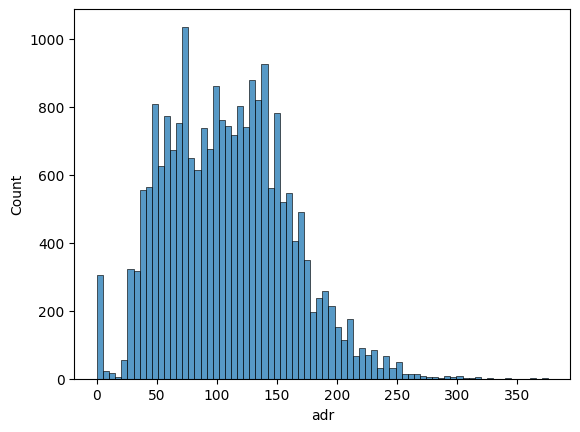

In [27]:
room_D = df[df['assigned_room_type'] == 'D'].drop_duplicates()
sns.histplot(room_D, x='adr')

It is likely an anomaly because:
- Most hotels don’t allow a single room with 2 adults + 10 children so it was likely meant to say 1 or 0.
- ADR (133.16) looks like a normal rate for 1–2 rooms, not for such a large group.
- Reservation status = 'No-Show', which might explain why it slipped through without being corrected on arrival.

**ACTION:** drop

In [28]:
condition = df['children'] == 10
df = df[~condition]

## Babies

View values

In [29]:
summary = value_counts_and_percentages(df.drop_duplicates(), ['babies'])
summary

,Count,%
babies,,
0,85999,99.0
1,882,1.0
2,15,0.0
9,1,0.0
10,1,0.0


Inspect babies > 5

In [30]:
df[df['babies'] > 5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,False,37,2016,January,3,12,0,2,2,...,No Deposit,9,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,False,11,2015,October,42,11,2,1,1,...,No Deposit,95,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


The rest of the details look to be consistent with small bookings. These are considered to be anomalies.

**ACTION:** drop

In [31]:
condition = df['babies'] > 5
df = df[~condition]

## Previous Cancellations

View values

In [32]:
summary = value_counts_and_percentages(df.drop_duplicates(), ['previous_cancellations'])
summary

,Count,%
previous_cancellations,,
0,85219,98.1
1,1401,1.6
2,111,0.1
3,60,0.1
4,30,0.0
11,27,0.0
5,19,0.0
6,17,0.0
13,4,0.0


Inspect records with high previous_cancellations

In [33]:
high_cancellations = df[df['previous_cancellations'] > 15].drop_duplicates()
high_cancellations


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14779,Resort Hotel,True,275,2015,October,41,4,2,0,2,...,Non Refund,208,NaN,0,Transient,50.00,0,0,Canceled,2015-01-30
14829,Resort Hotel,True,222,2015,September,38,15,1,5,2,...,Non Refund,252,NaN,0,Transient,49.95,0,0,Canceled,2015-03-03
14838,Resort Hotel,True,222,2015,September,38,15,1,5,2,...,Non Refund,252,NaN,0,Transient,38.00,0,0,Canceled,2015-03-03
14972,Resort Hotel,True,166,2015,July,29,15,0,2,2,...,Non Refund,NaN,NaN,0,Transient,121.50,0,0,Canceled,2015-04-28
14997,Resort Hotel,True,244,2015,September,36,3,0,3,2,...,Non Refund,NaN,NaN,0,Transient,36.00,0,0,Canceled,2015-04-29
15150,Resort Hotel,True,244,2015,September,36,2,2,5,2,...,No Deposit,96,NaN,0,Transient-Party,8.00,0,0,Canceled,2015-06-17
73714,City Hotel,True,265,2015,July,28,9,0,2,2,...,No Deposit,1,NaN,0,Transient-Party,62.80,0,0,Canceled,2014-10-17


View relationship between previous_cancellations and previous_bookings_not_canceled

<Axes: xlabel='previous_cancellations', ylabel='previous_bookings_not_canceled'>

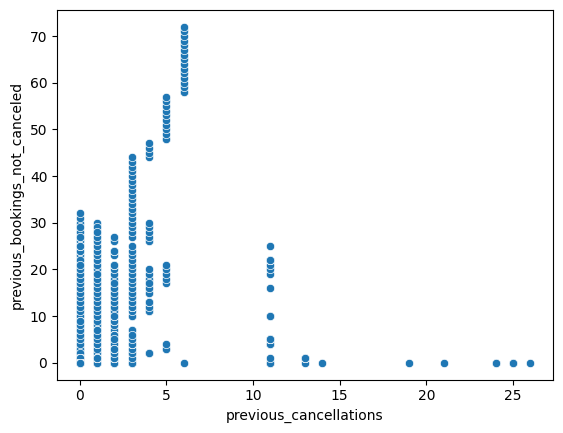

In [34]:
sns.scatterplot(df.drop_duplicates(), x='previous_cancellations', y='previous_bookings_not_canceled')

Guests who have very high cancellation rates are typically characterised by having no previous non-cancelled bookings and no other records after Oct 2015.

These are probably valid system records which were flagged by the hotel to prevent future bookings by these customers although they could represent a system design error (e.g. the same “guest” ID may be reused by an agent, inflating cancellation counts).

**ACTION:** keep

## Previous Bookings Not Cancelled

Inspect previous_bookings_not_canceled > 40

In [35]:
df[df['previous_bookings_not_canceled'] > 40].drop_duplicates()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
76697,City Hotel,False,2,2016,August,33,7,2,1,1,...,No Deposit,NaN,40,0,Transient,65.0,0,0,Check-Out,2016-08-10
76698,City Hotel,False,0,2016,August,36,29,1,2,1,...,No Deposit,NaN,40,0,Transient,65.0,0,0,Check-Out,2016-09-01
76699,City Hotel,False,1,2016,September,37,6,0,3,1,...,No Deposit,NaN,40,0,Transient,67.0,1,0,Check-Out,2016-09-09
76700,City Hotel,True,3,2016,September,38,12,1,2,1,...,No Deposit,NaN,40,0,Transient,67.0,0,0,No-Show,2016-09-12
76701,City Hotel,False,0,2016,September,38,13,0,2,1,...,No Deposit,NaN,40,0,Transient,67.0,1,0,Check-Out,2016-09-15
76702,City Hotel,False,3,2016,September,39,18,2,2,1,...,No Deposit,NaN,40,0,Transient,65.0,0,0,Check-Out,2016-09-22
76703,City Hotel,False,3,2016,September,40,26,3,7,1,...,No Deposit,NaN,40,0,Transient,65.0,0,0,Check-Out,2016-10-06
76704,City Hotel,False,3,2016,October,42,10,1,3,1,...,No Deposit,NaN,40,0,Transient,65.0,0,1,Check-Out,2016-10-14
76705,City Hotel,True,9,2016,October,43,19,0,1,1,...,No Deposit,NaN,40,0,Transient,65.0,0,0,Canceled,2016-10-17
76706,City Hotel,False,12,2016,October,43,19,0,1,1,...,No Deposit,NaN,40,0,Transient,65.0,0,0,Check-Out,2016-10-20


These bookings appear to be valid as they were all made to the City Hotel by the same company with low lead times.

**ACTION:** keep

## Booking Changes

View values

In [36]:
summary = value_counts_and_percentages(df.drop_duplicates(), ['booking_changes'])
summary

,Count,%
booking_changes,,
0,71225,82.0
1,10729,12.3
2,3466,4.0
3,864,1.0
4,352,0.4
5,115,0.1
6,59,0.1
7,31,0.0
8,17,0.0


In [37]:
df[df['booking_changes'] > 15].drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1655,Resort Hotel,False,30,2015,September,37,7,13,33,2,...,No Deposit,240,NaN,0,Transient,0.00,0,1,Check-Out,2015-10-23
9106,Resort Hotel,True,206,2016,October,44,27,2,5,2,...,No Deposit,240,NaN,0,Transient,46.88,0,1,Canceled,2016-07-25
41020,City Hotel,False,0,2015,August,33,10,9,20,0,...,No Deposit,NaN,47,0,Transient,0.00,0,0,Check-Out,2015-09-08
51964,City Hotel,False,159,2016,May,22,26,0,3,2,...,No Deposit,9,NaN,0,Transient,119.85,0,1,Check-Out,2016-05-29
88017,City Hotel,False,16,2016,March,11,11,14,35,0,...,No Deposit,NaN,215,0,Transient-Party,0.00,0,0,Check-Out,2016-04-29
111682,City Hotel,False,330,2017,May,19,11,0,3,2,...,No Deposit,9,NaN,0,Transient,109.80,0,3,Check-Out,2017-05-14
111689,City Hotel,False,330,2017,May,19,11,0,3,2,...,No Deposit,9,NaN,0,Transient,109.80,0,3,Check-Out,2017-05-14


These do not look like random errors since there are similarities:
- All of these bookings are associated with a company or an agent (most are tied to agent 9 or agent 240, which may represent large travel agencies or corporate portals)
- Some of these are very long stays and these are more likely to require some booking changes

They could possibly be explained by agencies using "change" instead of cancel/rebook.

**ACTION:** keep

## Days in Waiting List

In [38]:
summary = value_counts_and_percentages(df.drop_duplicates(), ['days_in_waiting_list'])
summary

,Count,%
days_in_waiting_list,,
0,86067,99.0
63,53,0.1
87,25,0.0
44,22,0.0
15,22,0.0
...,...,...
116,1,0.0
120,1,0.0
193,1,0.0


In [39]:
df[df['days_in_waiting_list'] > 300].drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
56957,City Hotel,True,422,2016,September,38,16,0,2,2,...,No Deposit,1,NaN,379,Transient-Party,65.0,0,0,Canceled,2016-08-22
56959,City Hotel,False,422,2016,September,38,16,0,2,2,...,No Deposit,1,NaN,379,Transient-Party,90.0,0,1,Check-Out,2016-09-18
56960,City Hotel,False,422,2016,September,38,16,0,2,2,...,No Deposit,1,NaN,379,Transient-Party,90.0,0,1,Check-Out,2016-09-18
57293,City Hotel,False,429,2016,September,39,23,0,2,2,...,No Deposit,1,NaN,330,Transient-Party,65.0,0,0,Check-Out,2016-09-25
57294,City Hotel,False,429,2016,September,39,23,0,2,2,...,No Deposit,1,NaN,330,Transient-Party,65.0,0,0,Check-Out,2016-09-25
57307,City Hotel,False,429,2016,September,39,23,0,2,2,...,No Deposit,1,NaN,330,Transient,65.0,0,0,Check-Out,2016-09-25
57320,City Hotel,True,429,2016,September,39,23,0,2,2,...,No Deposit,1,NaN,330,Transient-Party,65.0,0,0,Canceled,2016-09-23
58152,City Hotel,True,443,2016,October,41,7,0,2,2,...,Non Refund,1,NaN,391,Transient,65.0,0,0,Canceled,2016-09-20
59076,City Hotel,True,457,2016,October,43,21,0,2,2,...,Non Refund,1,NaN,391,Transient,65.0,0,0,Canceled,2016-09-20
59085,City Hotel,True,457,2016,October,43,21,0,2,2,...,Non Refund,1,NaN,391,Transient,65.0,0,0,Canceled,2016-09-20


These look to be valid entries because they share the following similiarities:
- same hotel (City)
- group bookings by the same agent (1)
- high lead times

They reflect group reservations booked far in advance, held on a waiting list until confirmed.

**ACTION:** keep

## Average Daily Rates

A negative value for ADR is not valid

**ACTION:** drop

In [40]:
condition = df['adr'] < 0
df = df[~condition]

View values

In [41]:
summary = value_counts_and_percentages(df.drop_duplicates(), ['adr'])
summary

,Count,%
adr,,
0.00,1748,2.0
75.00,1320,1.5
65.00,1258,1.4
48.00,875,1.0
85.00,858,1.0
...,...,...
7.80,1,0.0
8.34,1,0.0
8.43,1,0.0


Approximately 2% of unduplicated records have **adr = 0** so it is worth more exploration.

In [42]:
df_adr = df.copy().drop_duplicates()
df_adr['zero_adr'] = df_adr['adr'] == 0.0
df_adr['zero_adr'].value_counts(normalize=True)

zero_adr
False    0.979884
True     0.020116
Name: proportion, dtype: float64

### Distributions in Categorical Features

Look for differences in the distribution of categorical variables.

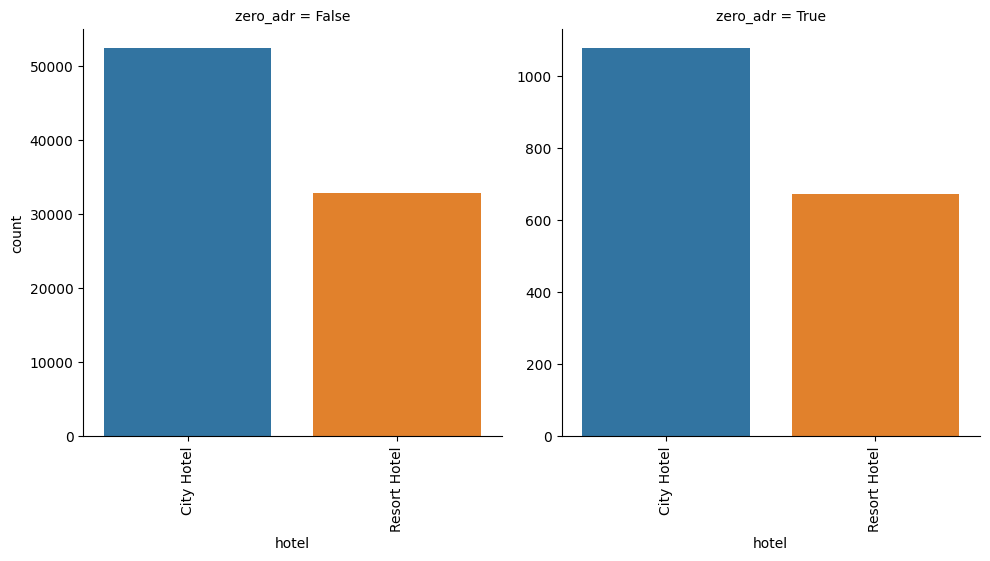

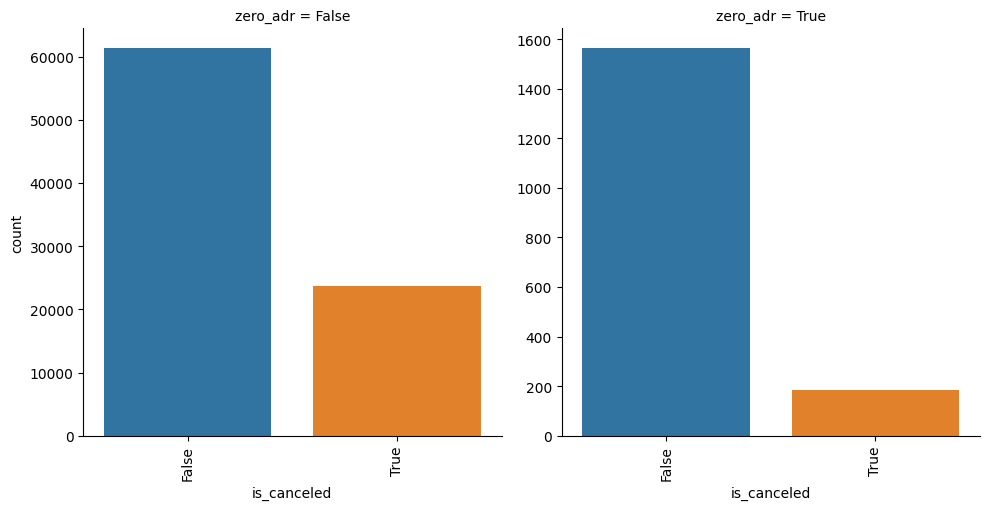

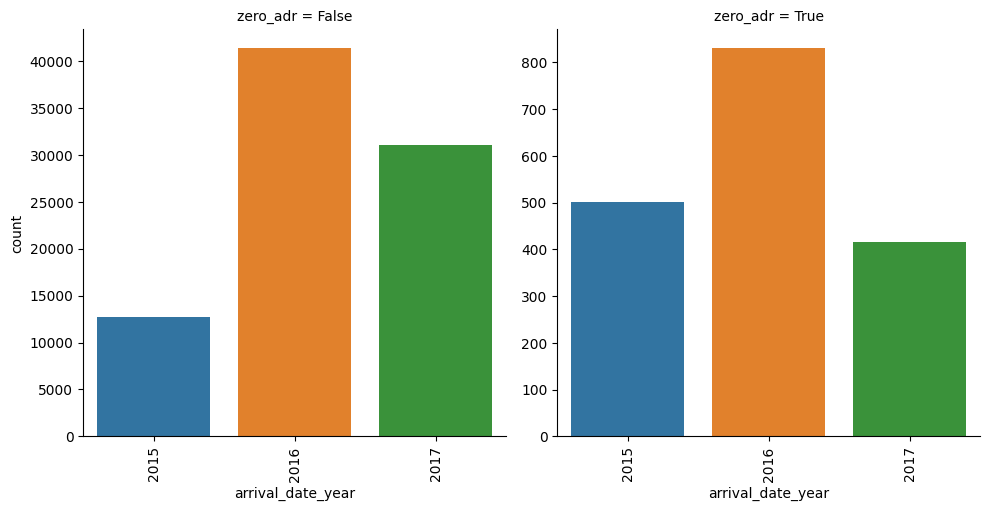

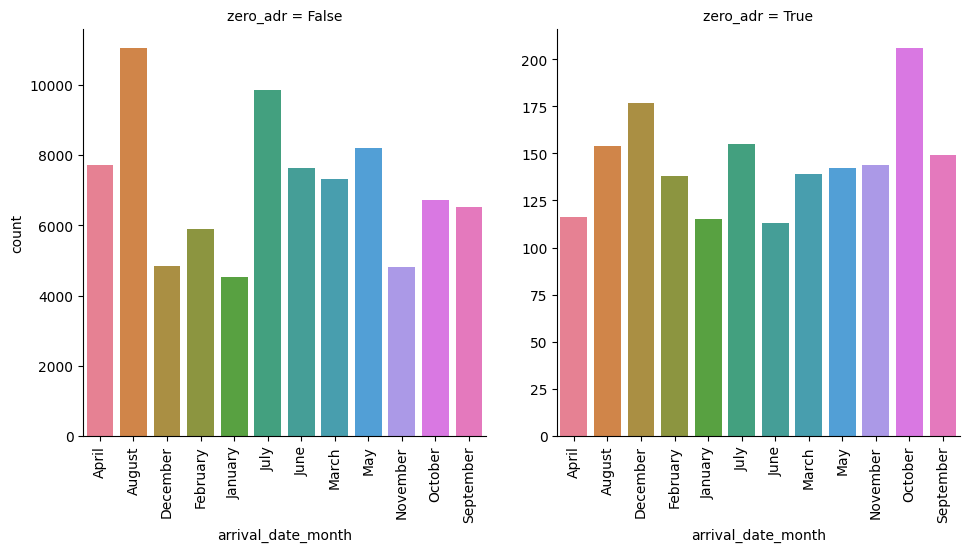

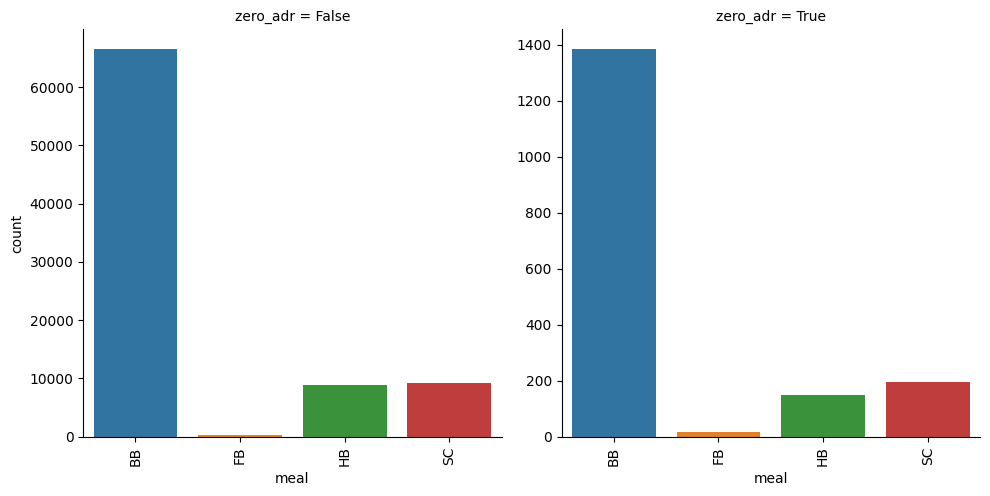

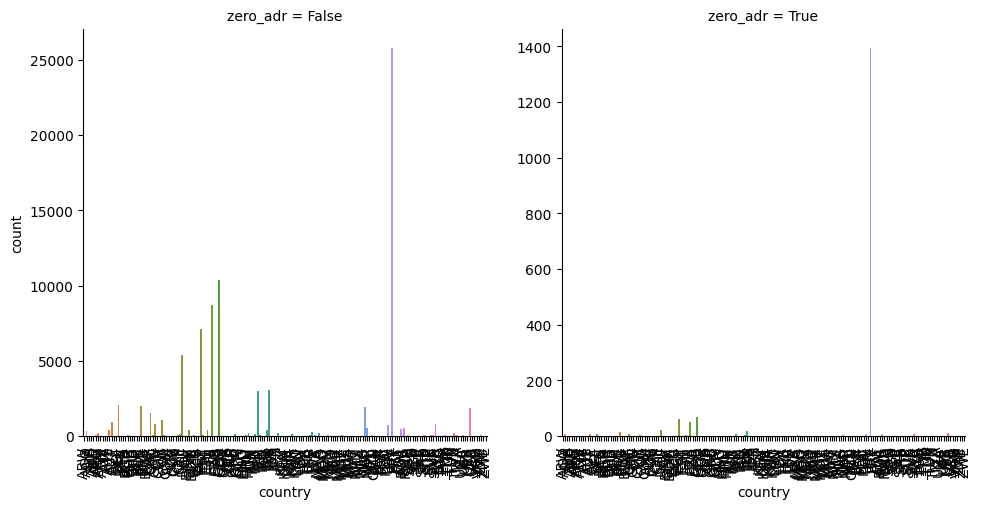

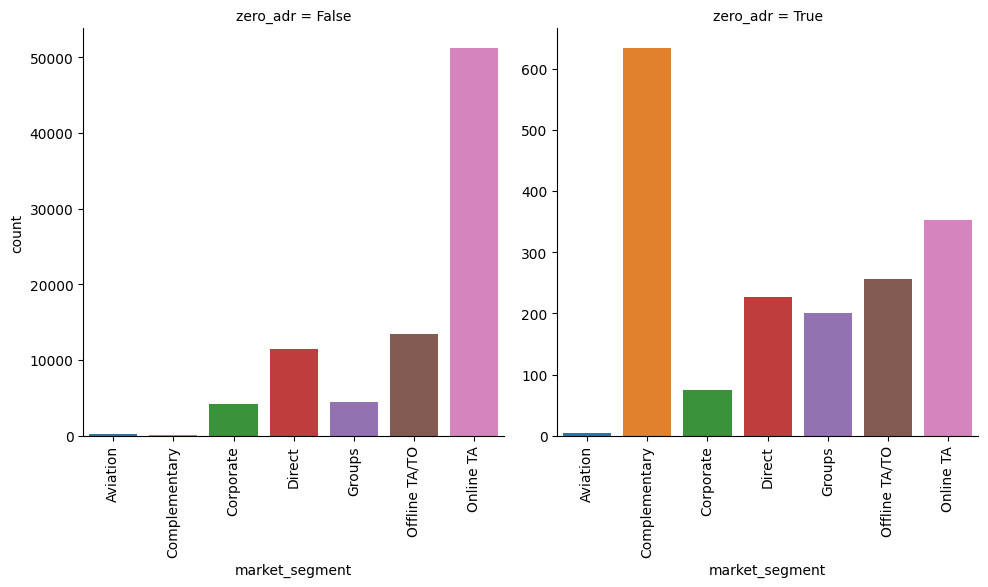

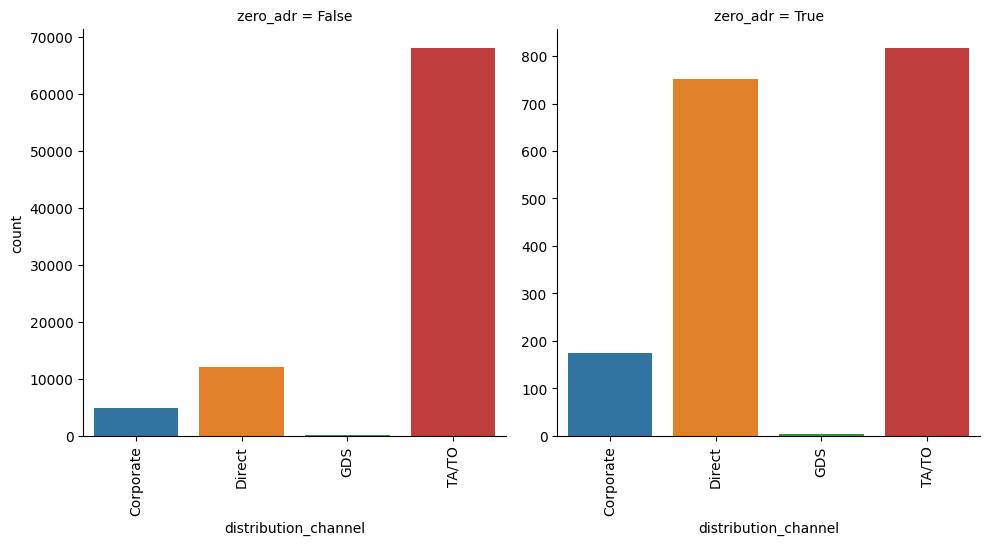

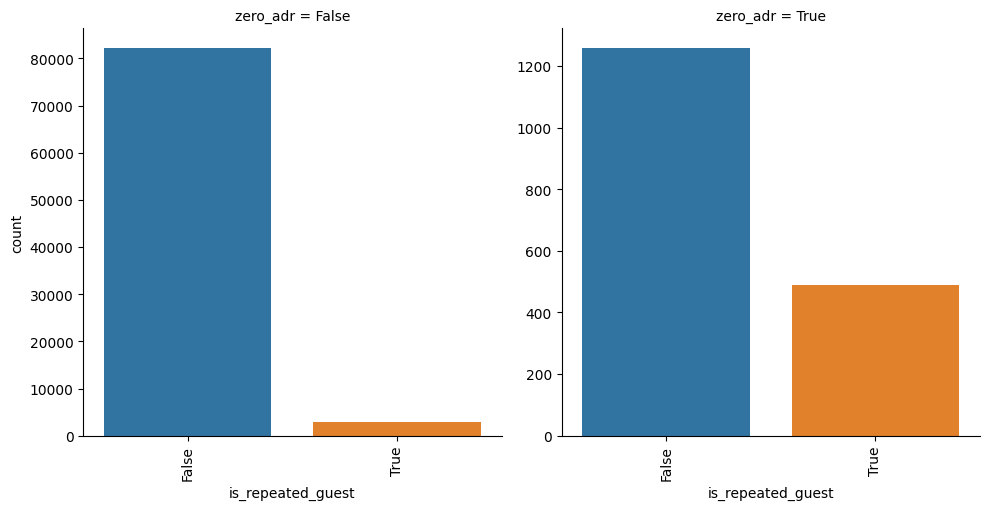

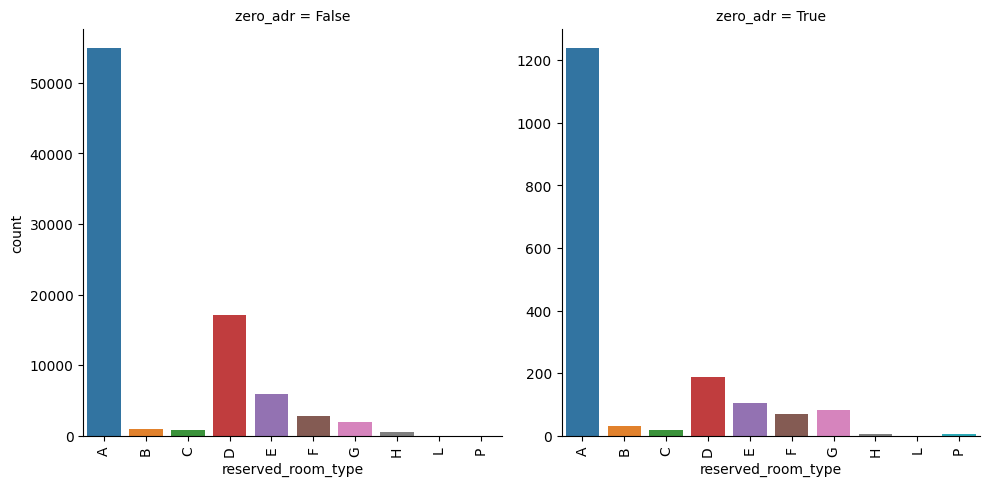

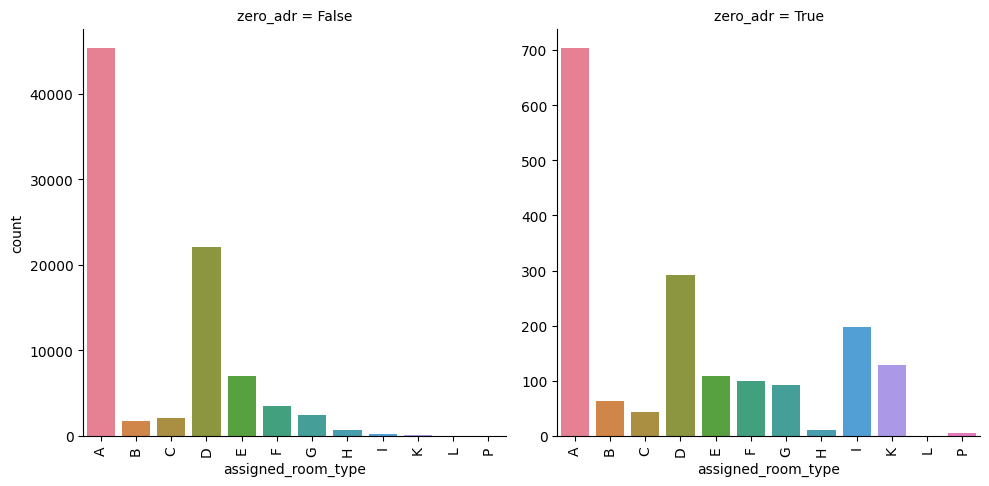

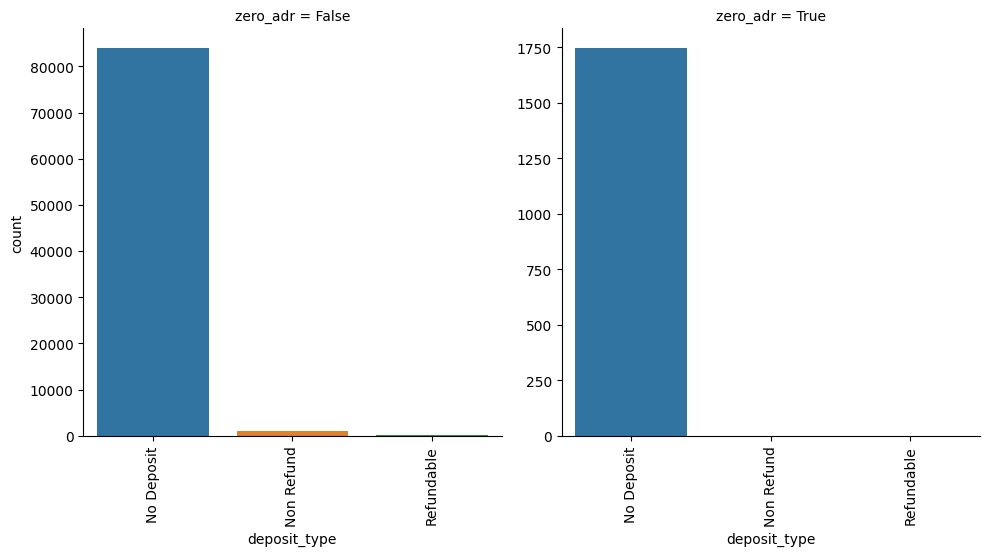

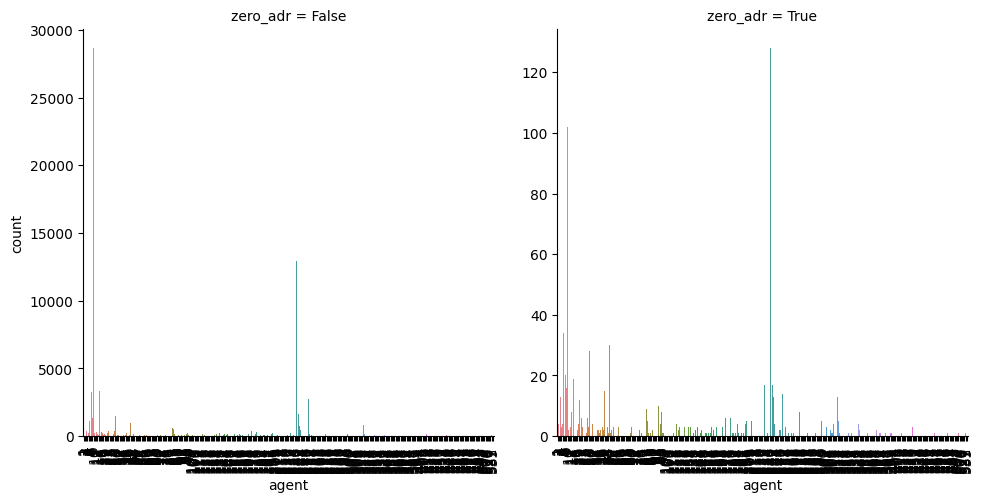

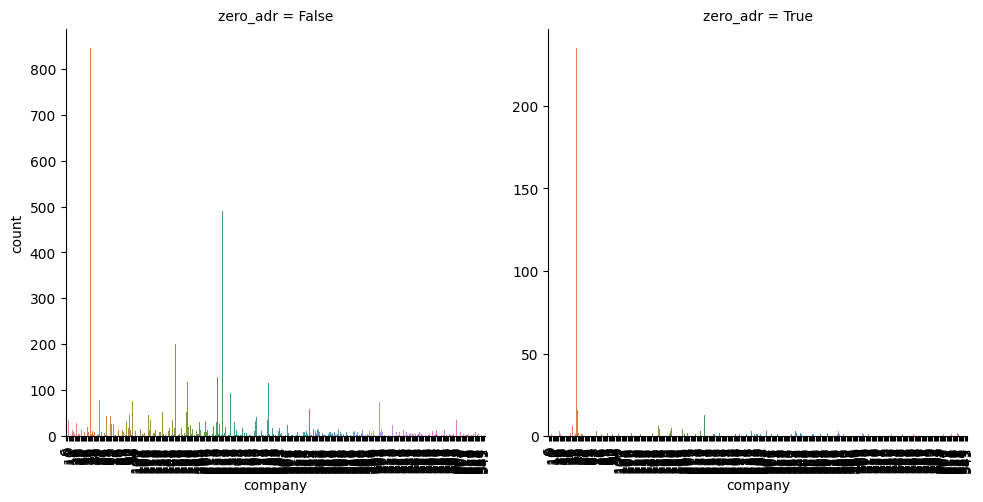

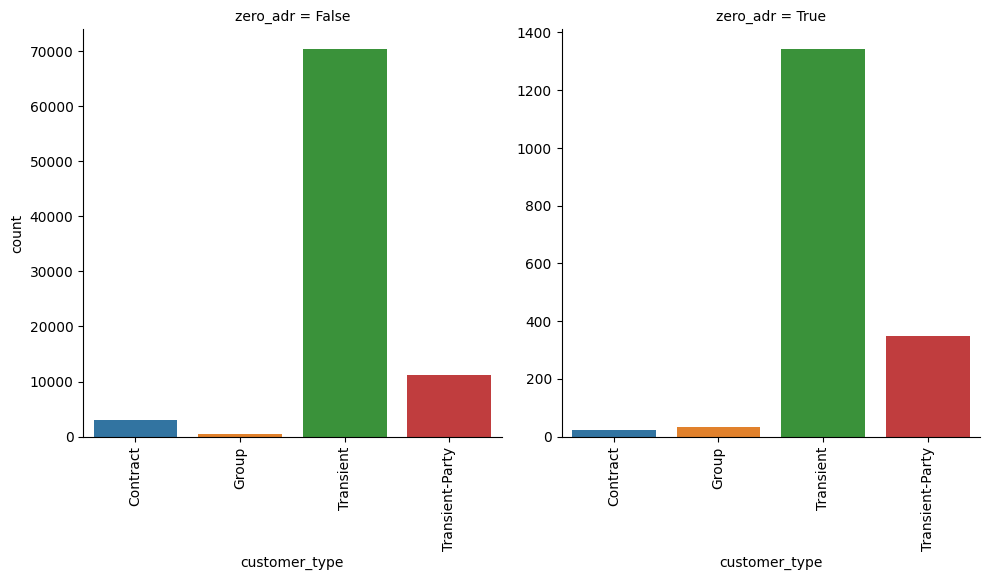

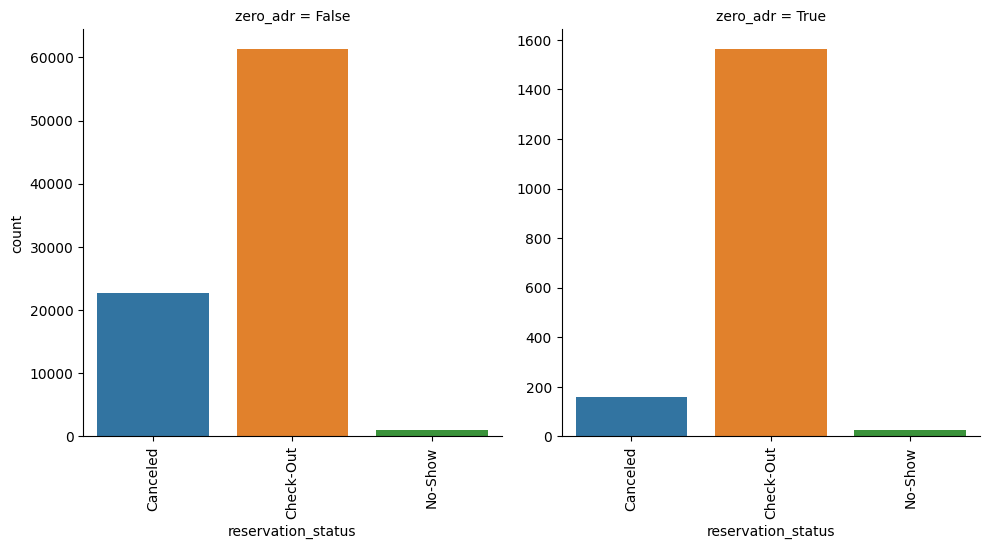

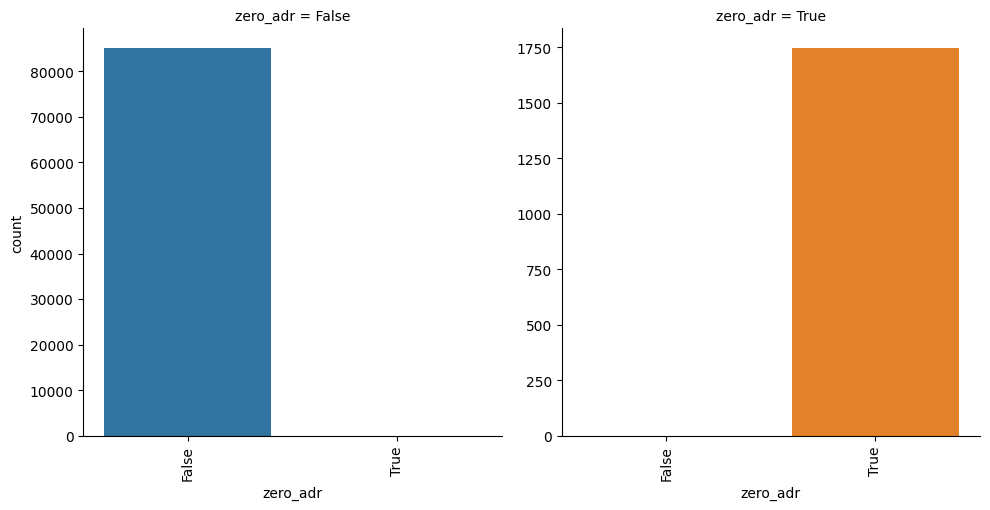

In [43]:
cat_features = df_adr.select_dtypes(['category', 'bool']).columns.to_list()
for feature in cat_features:
    plot_categorical_facets(df_adr, feature, 'zero_adr')

View which agents booked the most zero-adr bookings

In [44]:
df_adr[df_adr['zero_adr'] == True]['agent'].value_counts().head(3)

agent
240    128
9      102
1       91
Name: count, dtype: int64

View which companies booked the most zero-adr bookings

In [45]:
df_adr[df_adr['zero_adr'] == True]['company'].value_counts().head(3)

company
45     235
46      16
223     13
Name: count, dtype: int64

### Distributions in Numeric Features

View numeric features to investigate

In [46]:
numeric_features = df_adr.select_dtypes('number').columns.to_list()
print(numeric_features)

['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


View distributions of lead times

(0.0, 300.0)

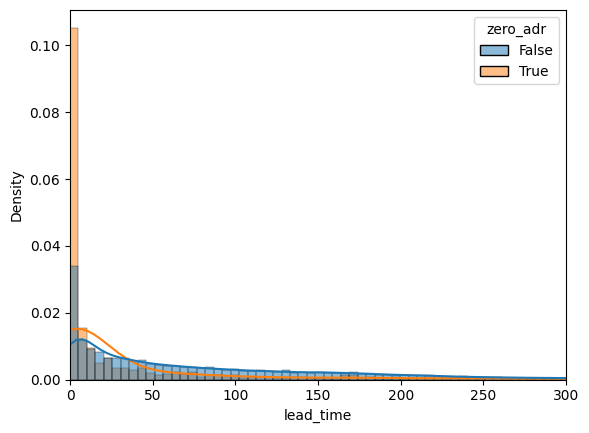

In [47]:
sns.histplot(df_adr, x='lead_time', hue='zero_adr', stat='density', common_norm=False, kde=True)
plt.xlim(0,300)

Bookings with zero-adr are much more likely to have zero lead time

In [48]:
df_zero = df_adr[df_adr['zero_adr']==True]
df_non_zero = df_adr[df_adr['zero_adr']==False]

zero_count = value_counts_and_percentages(df_zero, ['lead_time'])
non_zero_count = value_counts_and_percentages(df_non_zero, ['lead_time'])

summary = pd.concat([zero_count, non_zero_count], axis=1)
summary.drop('Count', axis=1, inplace=True)
summary.columns = ['zero-adr (%)', 'non zero-adr (%)']
summary

,zero-adr (%),non zero-adr (%)
lead_time,,
0,30.1,6.4
1,9.4,3.6
2,4.1,2.2
3,3.8,1.9
4,3.5,1.8
...,...,...
400,NaN,0.0
410,NaN,0.0
411,NaN,0.0


View duration of stay

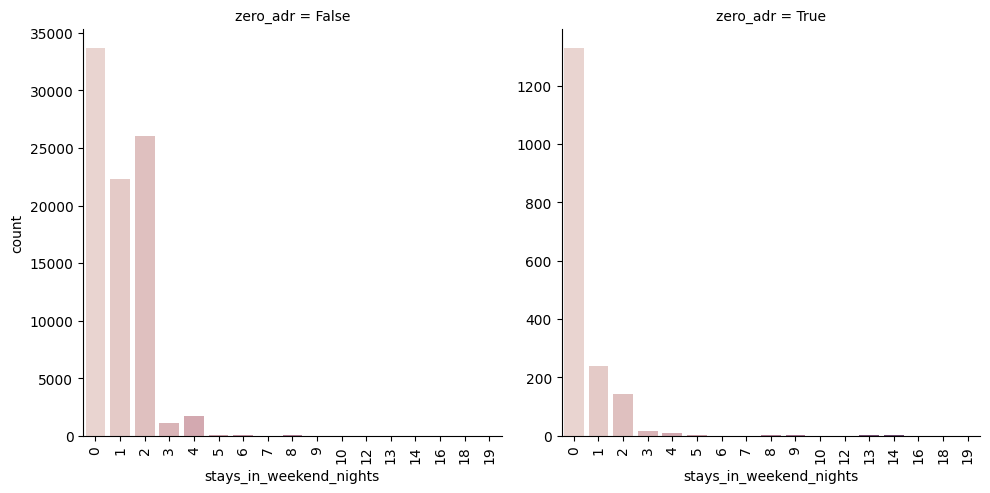

In [49]:
plot_categorical_facets(df_adr, 'stays_in_weekend_nights', 'zero_adr')

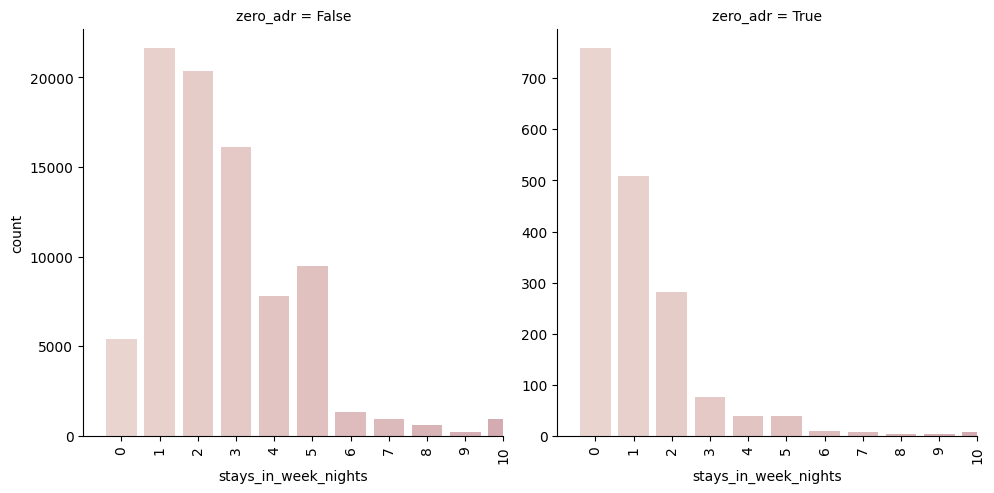

In [50]:
plot_categorical_facets(df_adr, 'stays_in_week_nights', 'zero_adr', (-1,10))

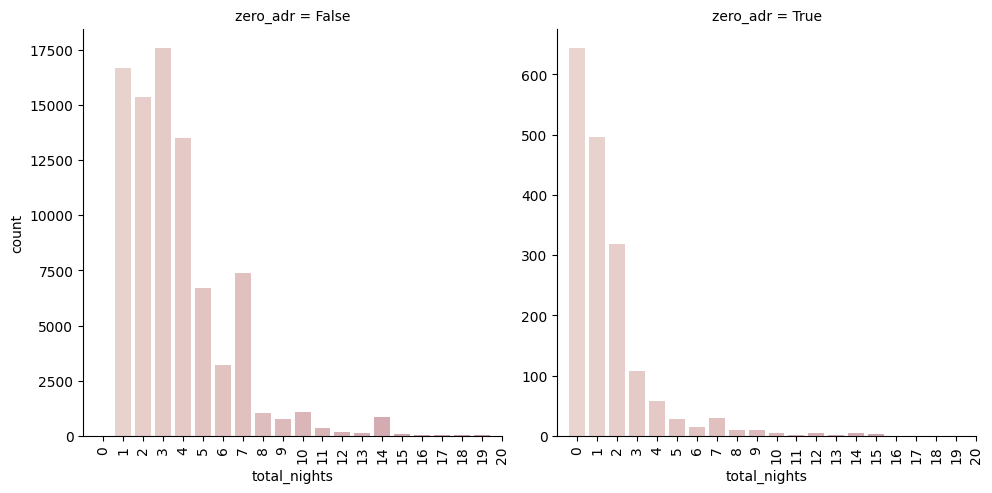

In [51]:
df_adr['total_nights'] = df_adr['stays_in_week_nights'] + df_adr['stays_in_weekend_nights']
plot_categorical_facets(df_adr, 'total_nights', 'zero_adr', (-1,20))

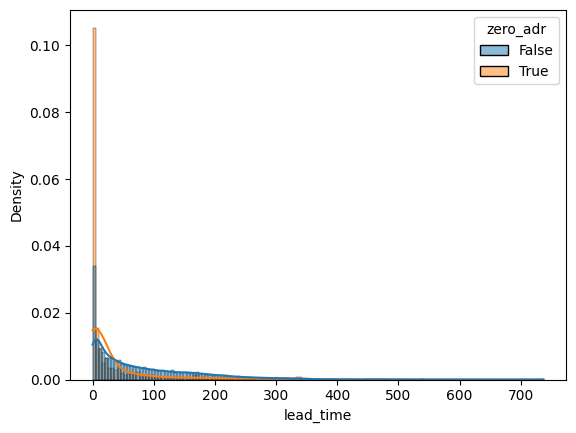

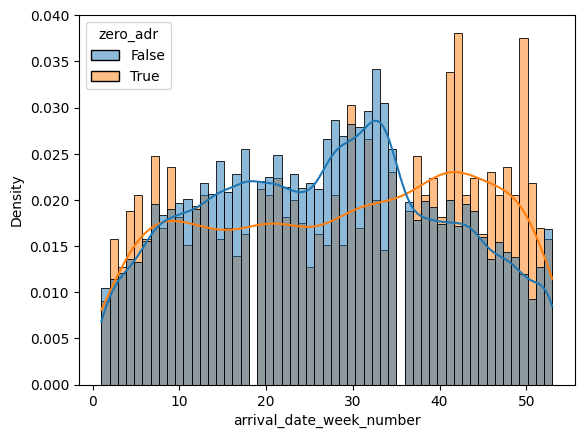

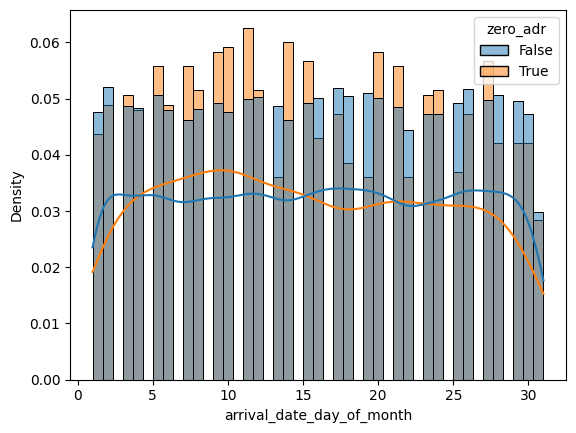

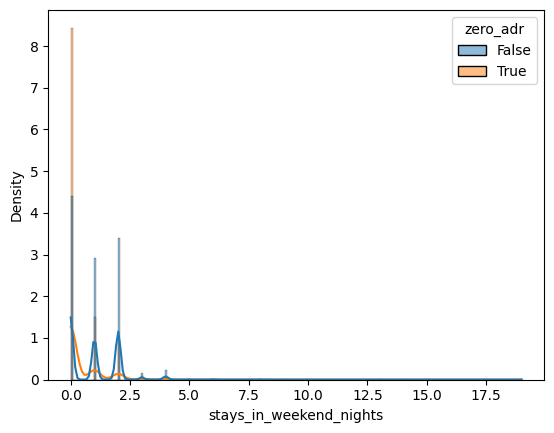

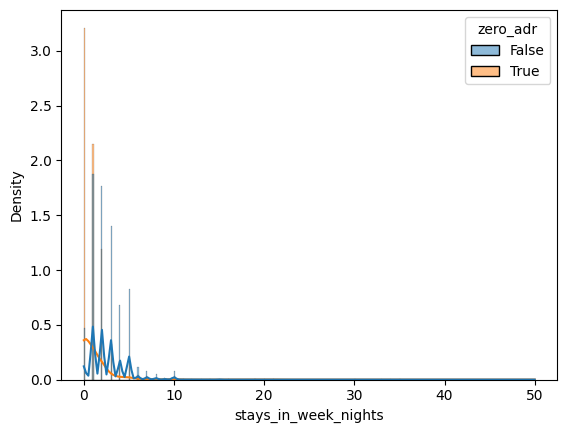

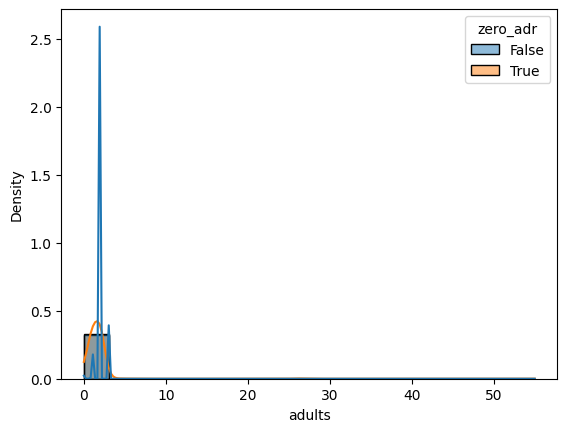

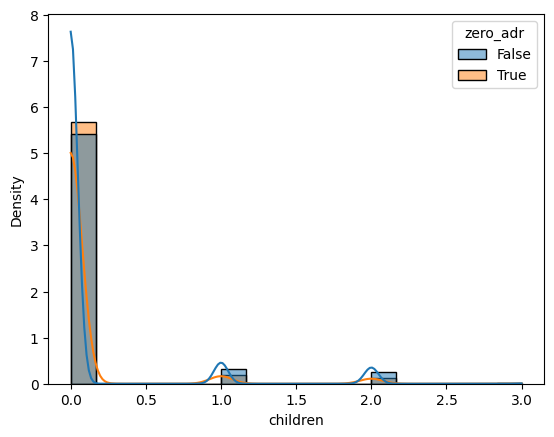

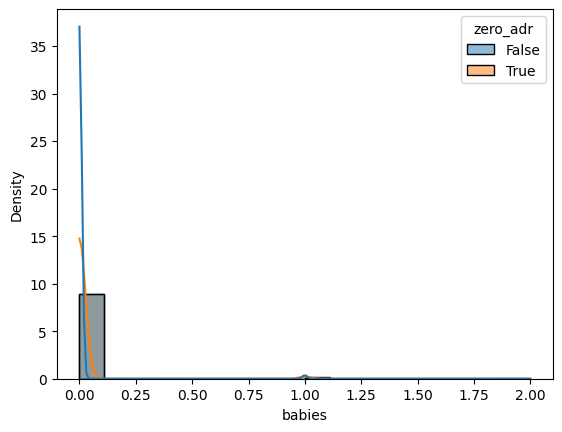

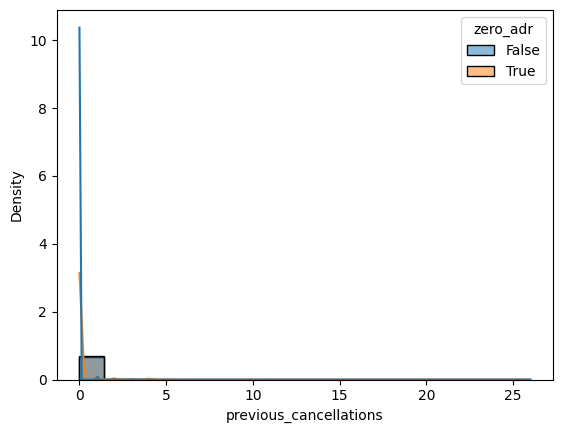

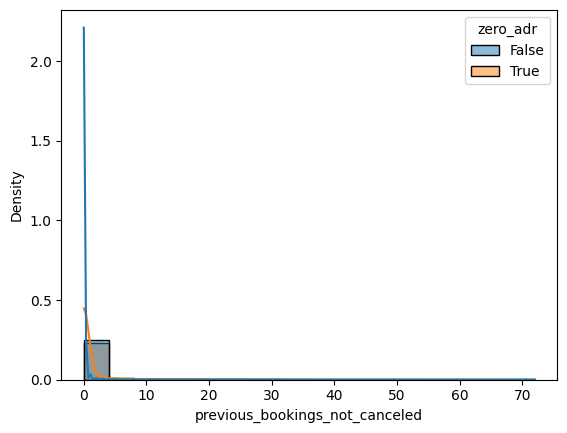

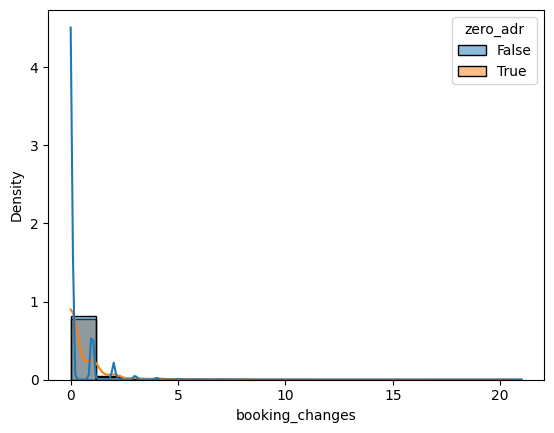

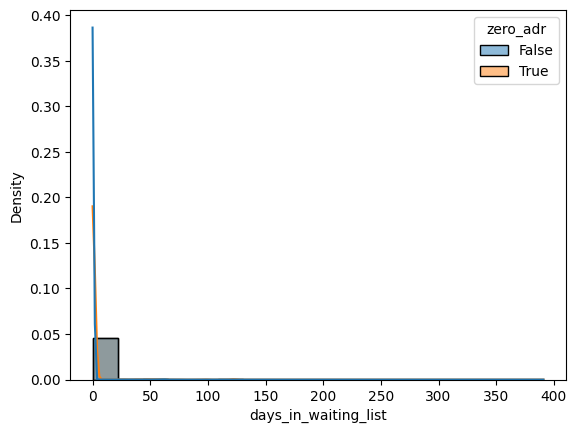

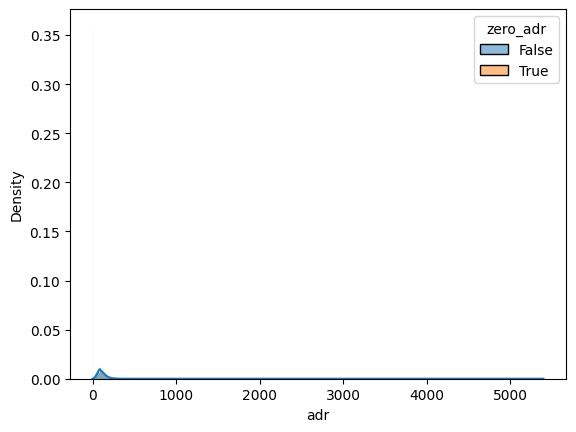

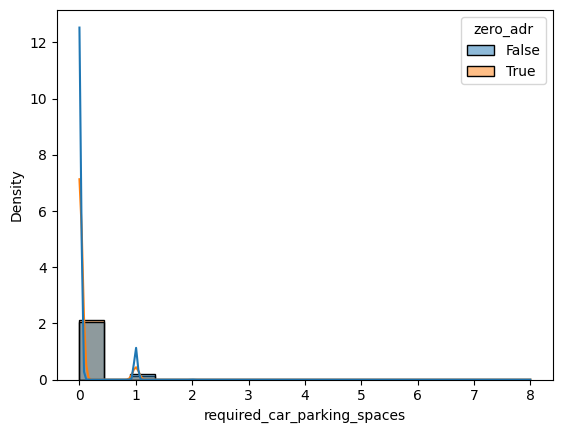

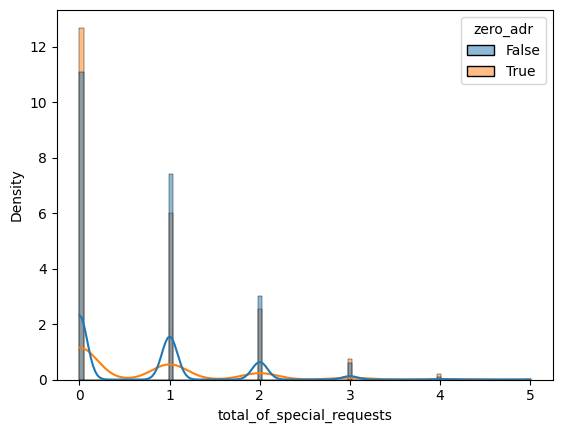

In [52]:
for feature in numeric_features:
    sns.histplot(df_adr, x=feature, hue='zero_adr', stat='density', common_norm=False, kde=True)
    plt.show()

### Conclusions

Compared to standard bookings, bookings with zero ADR have:
- lower percentage cancellations
- higher percentage `is_repeated_guest`
- higher percentages in Oct and Dec for `arrival_date_month`
- higher percentages of 'Complementary' for `market_segment`
- higher percentages of 'Direct' for `distribution_channel`
- higher perentage of room I and K for `assigned_room_type`
- higher percentage for 240 for `agent`
- predominantly been booked through company 45
- higher occurences of zero lead time
- fewer overnight stays and a large proportion of zero overnight stays 

These patterns make it unlikely that they are random errors. It is more likely that zero ADR represents valid "non-revenue" bookings such as staff stays, promotions, group allotments or company-specific deals where revenue is not recorded at ADR level.

**ACTION:** Keep

## Car Parking

View values

In [53]:
summary = value_counts_and_percentages(df.drop_duplicates(), ['required_car_parking_spaces'])
summary

,Count,%
required_car_parking_spaces,,
0,79627,91.6
1,7235,8.3
2,28,0.0
3,3,0.0
8,2,0.0


Inspect required_car_parking_spaces > 5

In [54]:
df[df['required_car_parking_spaces'] > 5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29045,Resort Hotel,False,26,2017,March,11,14,0,5,2,...,No Deposit,NaN,NaN,0,Transient-Party,40.0,8,1,Check-Out,2017-03-19
29046,Resort Hotel,False,138,2017,March,12,19,2,2,2,...,No Deposit,NaN,NaN,122,Transient-Party,80.0,8,0,Check-Out,2017-03-23


These are valid bookings because they are both corporate bookings classed under a `customer_type` of 'Transient-Party'.

**ACTION:** Keep

# Data Consistency Analysis

## Investigate Distribution Channel

### Initial Investigations

View values for `distribution_channel`

In [55]:
summary = value_counts_and_percentages(df, ['distribution_channel'])
display(summary)

,Count,%
distribution_channel,,
TA/TO,97019,82.1
Direct,14371,12.2
Corporate,6629,5.6
GDS,193,0.2


### `distribution_channel` + `agent`

We expect that when an **agent** is specified, **distribution_channel = TA/TO**

In [56]:
data = df[~df['agent'].isna()]
summary = value_counts_and_percentages(data, ['distribution_channel'])
display(summary)

,Count,%
distribution_channel,,
TA/TO,93955,91.9
Direct,6934,6.8
Corporate,1133,1.1
GDS,191,0.2


Findings
- **TA/TO** is expected:
  - This is the majority class with over 90% of all observations
  - ACTION: keep
- **Direct** is inconsistent:
  - Probably `distribution_channel` or `agent` is mis-labelled but impossible to know which.
  - ACTION: drop
- **Corporate** is possible:
  - Some corporate bookings are handled by travel agents (e.g. travel management companies).
  - ACTION: investigate further
- **GDS** is valid:
  - Many travel agents book via GDS.
  - ACTION: keep

Check that similar patterns are seen with both hotels

In [57]:
# City
city_data = df[(~df['agent'].isna() & (df['hotel'] == 'City Hotel'))]
city_summary = value_counts_and_percentages(city_data, ['distribution_channel'])

# Resort
resort_data = df[(~df['agent'].isna() & (df['hotel'] == 'Resort Hotel'))]
resort_summary = value_counts_and_percentages(resort_data, ['distribution_channel'])

# Concatenate into one table and remove counts
summary = pd.concat([city_summary, resort_summary], axis=1)
summary.drop('Count', axis=1, inplace=True)

# Rename column headings and display
summary.columns = ['% of City Hotel Bookings', '% of Resort Hotel Bookings']
summary


,% of City Hotel Bookings,% of Resort Hotel Bookings
distribution_channel,,
TA/TO,93.7,87.7
Direct,5.2,10.4
Corporate,0.8,1.8
GDS,0.3,0.0


Similar patterns are seen with both hotels so there don't seem to be issues with administrative errors in only one of the hotels.

Investigate `Corporate` further
- How many of the 1134 corporate bookings have a company ID specified alongside the travel agent?

In [58]:
data = df[(~df['agent'].isna()) & (~df['company'].isna())]
summary = value_counts_and_percentages(data, ['distribution_channel'])
display(summary)

,Count,%
distribution_channel,,
Corporate,132,60.8
TA/TO,64,29.5
Direct,20,9.2
GDS,1,0.5


Findings
- Only 132 of the 1134 agent bookings assigned distribution_channel = corporate have a company ID associated with them (~12%)
- These may still be valid records where the company was not recorded
- ACTION: keep 'Corporate' but drop 'Direct'


In [59]:
# Drop rows with specified agent but distribution_channel = 'Direct'
condition = (~df['agent'].isna()) & (df['distribution_channel'] == 'Direct')
df = df[~condition]

data = df[~df['agent'].isna()]
summary = value_counts_and_percentages(data, ['distribution_channel'])
display(summary)

,Count,%
distribution_channel,,
TA/TO,93955,98.6
Corporate,1133,1.2
GDS,191,0.2
Direct,0,0.0


### `distribution_channel` + `company`

We expect that when a **company** is specified, **distribution_channel = Corporate**

In [60]:
data = df[~df['company'].isna()]
summary = value_counts_and_percentages(data, ['distribution_channel'])
display(summary)

,Count,%
distribution_channel,,
Corporate,5046,75.1
TA/TO,889,13.2
Direct,784,11.7
GDS,1,0.0


Findings
- **Corporate** is expected:
  - This is the majority class with ~ 75% of all observations
  - ACTION: keep
- **TA/TO** is possible:
  - Some corporate bookings are handled by travel agents (e.g. travel management companies).
  - ACTION: keep
- **Direct** is inconsistent:
  - Probably `distribution_channel` or `company` is mis-labelled but impossible to know which.
  - ACTION: drop
- **GDS** is possible:
  - The company could have booked via GDS.
  - ACTION: keep

In [61]:
# Drop rows with specified company but distribution_channel = 'Direct'
condition = (~df['company'].isna()) & (df['distribution_channel'] == 'Direct')
df = df[~condition]

data = df[~df['company'].isna()]
summary = value_counts_and_percentages(data, ['distribution_channel'])
display(summary)

,Count,%
distribution_channel,,
Corporate,5046,85.0
TA/TO,889,15.0
GDS,1,0.0
Direct,0,0.0


## Investigate `is_canceled`

We expect that records with **is_canceled = 0** should have **reservation_status = 'Check-Out'**

In [62]:
data = df[df['is_canceled']==0]
summary = value_counts_and_percentages(data, ['reservation_status'])
display(summary)

,Count,%
reservation_status,,
Check-Out,67959,100.0
Canceled,0,0.0
No-Show,0,0.0


This is the case. We also expect that records with **is_canceled = 1** should have **reservation_status = 'Canceled' or 'No-Show'**

In [63]:
data = df[df['is_canceled']==1]
summary = value_counts_and_percentages(data, ['reservation_status'])
display(summary)

,Count,%
reservation_status,,
Canceled,41456,97.5
No-Show,1079,2.5
Check-Out,0,0.0


This is also the case so no cleaning required here.

## Investigate `is_repeated_guest`

This variable should relate to `previous_bookings_not_canceled` and `previous_cancellations` so these will each be investigated first.

### Investigate `previous_bookings_not_canceled`

According to the [original data source](https://www.sciencedirect.com/science/article/pii/S2352340918315191), this variable was assigned as follows:
> In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled.

Presumably this also applies to bookings made before the date range of the current dataset.

View counts

In [64]:
data = df.drop_duplicates(keep='first')  # Drop duplicates to prevent skewing the data
summary = value_counts_and_percentages(data, ['previous_bookings_not_canceled'])
display(summary)

,Count,%
previous_bookings_not_canceled,,
0,76783,96.1
1,1294,1.6
2,508,0.6
3,299,0.4
4,207,0.3
...,...,...
68,1,0.0
69,1,0.0
70,1,0.0


### Investigate `previous_cancellations`

According to the [original data source](https://www.sciencedirect.com/science/article/pii/S2352340918315191), this variable was assigned as follows:
> In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled.

Presumably this also applies to bookings made before the date range of the current dataset.

In [65]:
data = df.drop_duplicates(keep='first')  # Drop duplicates to prevent skewing the data
summary = value_counts_and_percentages(data, ['previous_cancellations'])
display(summary)

,Count,%
previous_cancellations,,
0,78347,98.0
1,1331,1.7
2,102,0.1
3,54,0.1
11,27,0.0
4,18,0.0
6,17,0.0
5,14,0.0
13,4,0.0


### Investigate `is_repeated_guest`

According to the [original data source](https://www.sciencedirect.com/science/article/pii/S2352340918315191), this variable was

> *"created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest."*

Create a `total_previous_bookings` column

In [66]:
df_prev_bookings = df.drop_duplicates(keep='first')
df_prev_bookings['total_previous_bookings'] = df_prev_bookings['previous_bookings_not_canceled'] + df_prev_bookings['previous_cancellations']
df_prev_bookings.head(3)


C:\Users\Music\AppData\Local\Temp\ipykernel_1616\3602261742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prev_bookings['total_previous_bookings'] = df_prev_bookings['previous_bookings_not_canceled'] + df_prev_bookings['previous_cancellations']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_previous_bookings
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0


We expect that all records with **is_repeated_guest = 0** will have no previous non-cancelled bookings but this is not found to be the case.

In [67]:
data = df_prev_bookings[df_prev_bookings['is_repeated_guest']==0]
summary = value_counts_and_percentages(data, ['total_previous_bookings', 'previous_bookings_not_canceled', 'previous_cancellations', 'is_repeated_guest'])
display(summary)

Count  \
total_previous_bookings previous_bookings_not_canceled previous_cancellations is_repeated_guest          
0                       0                              0                      False              75310   
1                       0                              1                      False                879   
                        1                              0                      False                300   
2                       2                              0                      False                 95   
3                       3                              0                      False                 57   
...                                                                                                ...   
26                      0                              26                     False                  1   
28                      27                             1                      False                  1   
29                      28                             1                      False                  1   
31                      30                             1                      False                  1   
36                      25                             11                     False                  1   

                                                                                                    %  
total_previous_bookings previous_bookings_not_canceled previous_cancellations is_repeated_guest        
0                       0                              0                      False              97.9  
1                       0                              1                      False               1.1  
                        1                              0                      False               0.4  
2                       2                              0                      False               0.1  
3                       3                              0                      False               0.1  
...                                                                                               ...  
26                      0                              26                     False               0.0  
28                      27                             1                      False               0.0  
29                      28                             1                      False               0.0  
31                      30                             1                      False               0.0  
36                      25                             11                     False               0.0  

[68 rows x 2 columns]

We expect that all records with **is_repeated_guest = 1** will have at least one previous non-cancelled booking but this is not found to be the case either. 

In [68]:
data = df_prev_bookings[df_prev_bookings['is_repeated_guest']==1]
summary = value_counts_and_percentages(data, ['total_previous_bookings', 'previous_bookings_not_canceled', 'previous_cancellations', 'is_repeated_guest'])
display(summary)

,,,,Count,%
total_previous_bookings,previous_bookings_not_canceled,previous_cancellations,is_repeated_guest,,
1,1,0,True,934,30.8
0,0,0,True,475,15.7
2,2,0,True,366,12.1
3,3,0,True,196,6.5
4,4,0,True,126,4.2
...,...,...,...,...,...
74,68,6,True,1,0.0
75,69,6,True,1,0.0
76,70,6,True,1,0.0


Since the is_repeated_guest feature is derived from whether the PMS had a guest profile created before the booking (rather than using the previous booking data), the discrepancy may have predictive power when training the model.
- ACTION: add an additional feature (an inconsistency flag) during feature engineering and assess feature importance after training the model to see if the signal has any significance.

# Missing Data

## Initial Overview

Helper function for sumarising missing data

In [69]:
def summarise_missing_data():
    # Get variables with missing data
    missing = pd.DataFrame(df.isna().sum(), columns=['count'])
    missing = missing[missing['count'] > 0]

    # Add percentage column
    total = len(df)
    missing['%'] = round(100 * missing['count'] / total,2)

    return missing

View variables with missing data

In [70]:
summarise_missing_data()

,count,%
country,453,0.41
agent,15215,13.77
company,104558,94.63


*NOTE: Although the profile report identified 4 missing values for `children`, these have been removed in the data cleaning steps already taken.*

## Handling missing `agent` and `company`

According to the [original data source](https://www.sciencedirect.com/science/article/pii/S2352340918315191), an empty value should be interpreted as 'not applicable' for `agent` and `company`. However, in this dataset, when comparing missing values with the `distribution_channel`, it appears that there were a significant number of bookings were made by travel agents (or tour operators) but the agent ID was not recorded.

In [71]:
summary = value_counts_and_percentages(df[df['agent'].isna()].drop_duplicates(), ['distribution_channel'])
summary

,Count,%
distribution_channel,,
Direct,5860,51.4
Corporate,4360,38.3
TA/TO,1168,10.3
GDS,2,0.0


Similarly, some bookings were made by companies but the company ID was not recorded.

In [72]:
summary = value_counts_and_percentages(df[df['company'].isna()].drop_duplicates(), ['distribution_channel'])
summary

,Count,%
distribution_channel,,
TA/TO,68337,90.7
Direct,5860,7.8
Corporate,995,1.3
GDS,180,0.2


Since these columns contain numeric identifiers for each agent/company, a value of zero could be used to represent 'not specified' if it doesn't already exist.

Let's check if zero is already a category

In [73]:
print('Agent 0 exists:', (df['agent'] == 0).any())
print('Company 0 exists:', (df['company'] == 0).any())

Agent 0 exists: False
Company 0 exists: False


Since neither features have a category of zero, this category will be created and used for when the agent/company is not specified.

In [74]:
df['agent'] = df['agent'].cat.add_categories([0]).fillna(0)
df['company'] = df['company'].cat.add_categories([0]).fillna(0)
summarise_missing_data()

,count,%
country,453,0.41


---

## Handle Missing `country`

Since it is common for hotels not to know the correct nationality of guests until the moment of check-in, we will check whether missing values are associated with cancelled bookings.

In [75]:
summary = value_counts_and_percentages(df[df['country'].isna()].drop_duplicates(), ['reservation_status'])
summary

,Count,%
reservation_status,,
Check-Out,385,92.3
Canceled,28,6.7
No-Show,4,1.0


Only ~7% of missing values are associated with guests who did not check-in so check if the missing values come predominantly from one hotel.

In [76]:
summary = value_counts_and_percentages(df[df['country'].isna()].drop_duplicates(), ['hotel'])
summary

,Count,%
hotel,,
Resort Hotel,413,99.0
City Hotel,4,1.0


Most missing values (99%) are associated with the Resort hotel so lets analyse the nationality of guests at the resort hotel.

In [77]:
df_resort = df[df['hotel'] == 'Resort Hotel'].drop_duplicates()
summary = value_counts_and_percentages(df_resort, ['country'])
summary

,Count,%
country,,
PRT,12467,41.3
GBR,5380,17.8
ESP,3005,9.9
IRL,1718,5.7
FRA,1221,4.0
...,...,...
STP,0,0.0
SMR,0,0.0
TZA,0,0.0


Most of the guests at the resort hotel are from Portugal but they still constitute less than half of the total guests. Therefore, it is not immediately obvious which country the guests with missing data are from.

Since missing values constitutes a very small percentage of the data, these records will be dropped.

**ACTION:** Drop

In [78]:
df.dropna(subset=['country'], inplace=True)
summarise_missing_data()

,count,%


# Duplicate Records

## Overview

View extent of duplicated records

In [79]:
total_count = df.shape[0]

unique_count = df.drop_duplicates(keep=False).shape[0]
unique_percent = round(100*unique_count/total_count,1)

duplicated_count = df.duplicated(keep=False).sum()
duplicated_percent = round(100*duplicated_count/total_count,1)

print(f'Total Records: {total_count}')
print(f'Unique Records: {unique_count} ({unique_percent}%)')
print(f'Records with duplicates: {duplicated_count} ({duplicated_percent}%)')

Total Records: 110041
Unique Records: 71875 (65.3%)
Records with duplicates: 38166 (34.7%)


Distinguish unique records from those with duplicates

In [80]:
grouped_records = df.value_counts().reset_index(name="count")

unique_records = grouped_records[grouped_records['count']==1]
duplicate_groups = grouped_records[grouped_records['count']>1]

print('Number of unique records:', unique_records.shape[0])
print('Number of distinct duplicate record groups:', duplicate_groups.shape[0])

Number of unique records: 71875
Number of distinct duplicate record groups: 7630


Show distribution for numbers of duplicates in each group

<Axes: xlabel='count', ylabel='Count'>

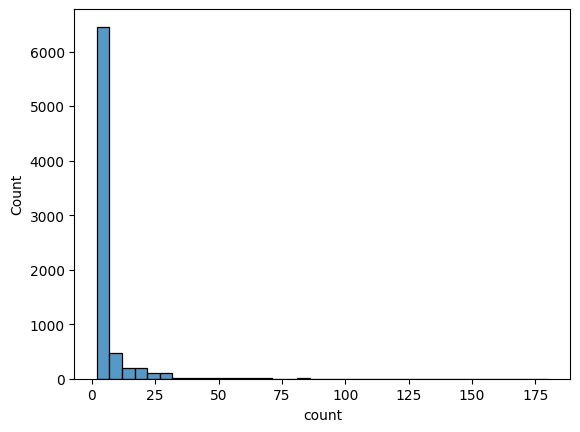

In [81]:
sns.histplot(data=duplicate_groups, x='count', binwidth=5)

View these as percentages for most common group sizes

In [82]:
summary = value_counts_and_percentages(duplicate_groups, ['count'])
summary.head(5)

,Count,%
count,,
2,4679,61.3
3,898,11.8
4,456,6.0
5,261,3.4
6,161,2.1


Nearly all of the duplicate records have less than 30 exact duplicates with the vast majority of these with between 1 and 5 duplicates. It is not implausible that a small number of records could have identical information, especially if the hotels are large, bookings were made in bulk (by travel agents or companies) and bookings were made in response to advertised special offers. However, it is highly unlikely that more than 5 independent bookings should have exactly the same information and these would likely be system errors.

 ## Top Ten Duplicated Individual Records

View extent of duplication for individual records (see `count` - far right column).

In [83]:
duplicate_groups.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,count
0,City Hotel,True,277,2016,November,46,7,1,2,2,...,0,0,0,Transient,100.0,0,0,Canceled,2016-04-04,180
1,City Hotel,True,68,2016,February,8,17,0,2,2,...,37,0,0,Transient,75.0,0,0,Canceled,2016-01-06,150
2,City Hotel,True,188,2016,June,25,15,0,2,1,...,119,0,39,Transient,130.0,0,0,Canceled,2016-01-18,109
3,City Hotel,True,158,2016,May,22,24,0,2,1,...,37,0,31,Transient,130.0,0,0,Canceled,2016-01-18,101
4,City Hotel,True,34,2015,December,50,8,0,2,1,...,19,0,0,Transient,90.0,0,0,Canceled,2015-11-17,100
5,City Hotel,True,28,2017,March,9,2,0,3,2,...,0,0,0,Transient,95.0,0,0,Canceled,2017-02-02,99
6,City Hotel,True,156,2017,April,17,26,0,3,2,...,37,0,0,Transient,100.0,0,0,Canceled,2016-11-21,99
7,City Hotel,True,38,2017,January,2,14,0,1,1,...,0,67,0,Transient,75.0,0,0,Canceled,2016-12-07,99
8,City Hotel,True,71,2016,June,25,14,0,3,1,...,236,0,0,Transient,120.0,0,0,Canceled,2016-04-27,89
9,City Hotel,True,304,2016,November,45,3,0,3,2,...,21,0,0,Transient,89.0,0,0,Canceled,2016-02-01,85


The following similarities are observed:
- same hotel (City)
- all were cancelled
- short stays (1 to 3 nights) predominantly mid-week
- no children or babies
- same meal type (BB)
- all booked through travel agents or corporate organisations
- none are repeated guests
- same reserved and assigned room type (A)
- no booking changes
- non refundable deposits
- three from the same agent (37)
- no special requests

These are most likely all group bookings where each room is recorded as a separate record and the rooms were later cancelled on bulk. However, only half of these records have been assigned as 'Groups' under `market_segment` with others preferring to label them as Offline bookings from travel agents.

Since there is no booking reference ID included, it is impossible to know whether these duplicate records relate to the same instance.

## Distributions for Different Duplication Size Bins

Create independent copy of dataframe (to remove user warnings)

In [84]:
duplicate_groups = duplicate_groups.copy()

Create `dup_category` variable for different levels of duplication

In [85]:
# Define bins for counts
bins = [0, 5, 20, 50, float('inf')]  
labels = ['Very Low (<5)', 'Low (5-20)', 'Medium (20-50)', 'High (50+)']

# Assign each group to a category
duplicate_groups['dup_category'] = pd.cut(duplicate_groups['count'], bins=bins, labels=labels, right=False)
duplicate_groups.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,count,dup_category
0,City Hotel,True,277,2016,November,46,7,1,2,2,...,0,0,Transient,100.0,0,0,Canceled,2016-04-04,180,High (50+)
1,City Hotel,True,68,2016,February,8,17,0,2,2,...,0,0,Transient,75.0,0,0,Canceled,2016-01-06,150,High (50+)
2,City Hotel,True,188,2016,June,25,15,0,2,1,...,0,39,Transient,130.0,0,0,Canceled,2016-01-18,109,High (50+)


Define function to assist with generating comparison plots

In [86]:
def generate_group_percentage_plots(data, group_by, target_feature):
    # Count combinations
    counts = (data.groupby([group_by, target_feature], observed=True).size().reset_index(name='count'))

    # Calculate percentages within each dup_category
    counts['percentage'] = counts.groupby(group_by, observed=True)['count'].transform(lambda x: x / x.sum() * 100)

    # Plot
    plt.figure(figsize=(10,6))
    sns.barplot(data=counts, x=group_by, y='percentage', hue=target_feature, palette='Set1')
    plt.xticks(rotation=45)
    plt.xlabel('Size of Duplicate Group')
    plt.ylabel('Percentage')
    plt.title(f"Percentage {target_feature} by duplicate group size")
    plt.legend(title=target_feature)
    plt.tight_layout()
    plt.show()

### Analyse `dup_category` by Market Segments

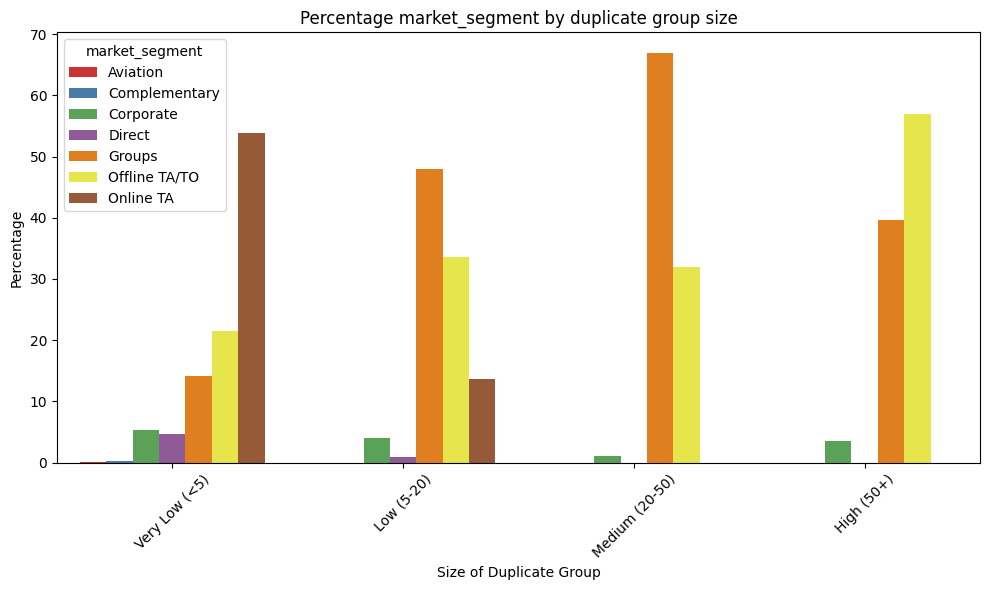

In [87]:
generate_group_percentage_plots(duplicate_groups, 'dup_category', 'market_segment')

'Groups' and 'Offline TA/TO' become more prominant in larger duplicate group sizes which supports the theory that duplicate records are largely group bookings by travel agents.

### Analyse `dup_category` by Distribution Channel

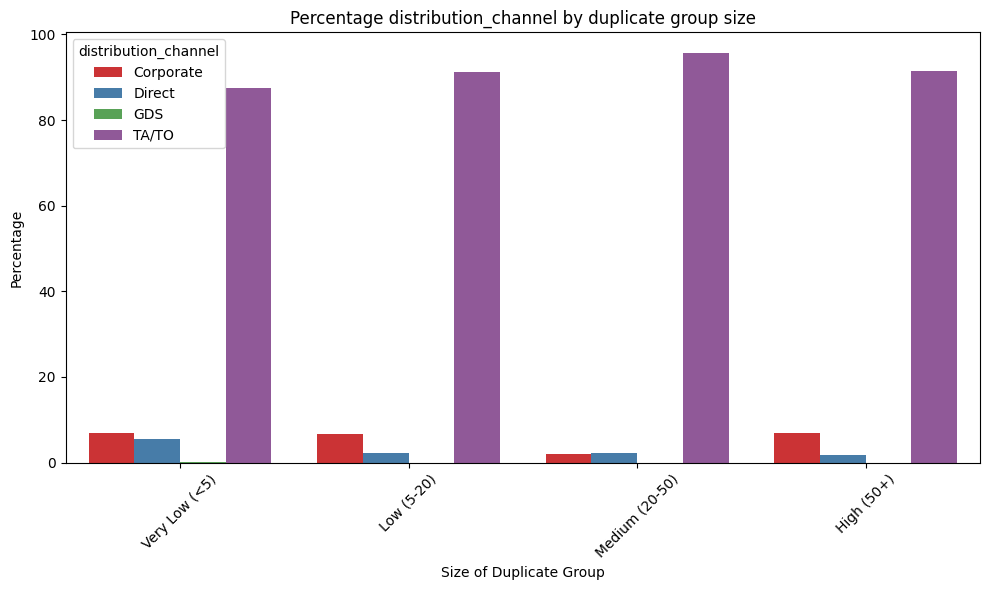

In [88]:
generate_group_percentage_plots(duplicate_groups, 'dup_category', 'distribution_channel')

Similar proportions for distribution channels are observed in each duplicate group category. There is perhaps a small increase in the proportion of bookings made by travel agents but the percentage of these bookings is already very high and differences may not be statistically significant.

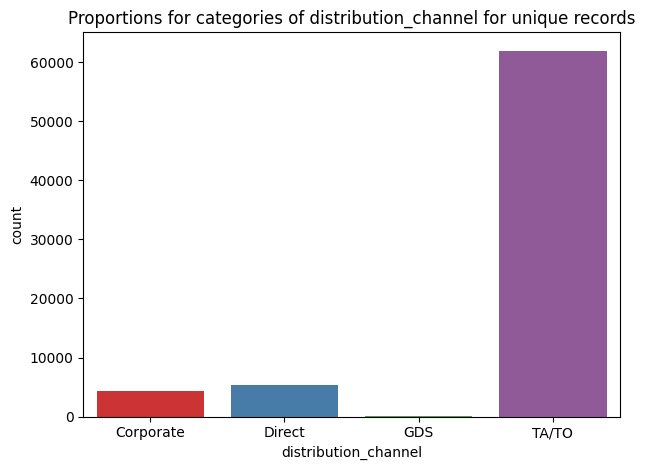

In [89]:
sns.countplot(unique_records, x='distribution_channel', hue='distribution_channel', palette='Set1')
plt.title('Proportions for categories of distribution_channel for unique records')
plt.tight_layout()
plt.show()

Similar proportions are seen with unique records.

### Duplicated records by `agent`

View top 10 agents by number of *different* duplicated records

In [90]:
duplicate_groups['agent'].value_counts().head(10)

agent
9      2193
0       969
240     653
1       652
6       246
7       189
3       135
28      130
8        99
229      90
Name: count, dtype: int64

View top 10 agents by total number of duplicated records

In [91]:
duplicate_groups.groupby('agent', observed=True)['count'].sum().sort_values(ascending=False).head(10)

agent
1      6611
9      5394
0      4785
6      2415
240    1547
3      1108
37     1082
19      959
21      765
229     658
Name: count, dtype: int64

Duplicate records are not distributed randomly between agents but tend to focus on certain big players (especially those with IDs of 1, 9, 6, 240 and 3). This suggests that the duplicates can be explained by the booking behaviours of these agents.

### Duplicated Records by Cancellation Rates

Investigate relationship between cancellations and duplicate records

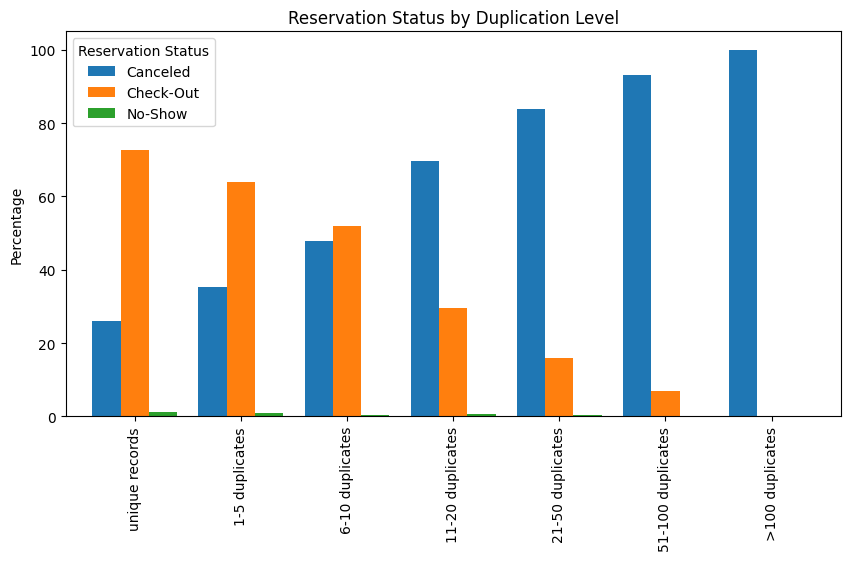

In [92]:
bins = [0, 1, 5, 10, 20, 50, 100, float('inf')]
labels = [
    'unique records',
    '1-5 duplicates',
    '6-10 duplicates',
    '11-20 duplicates',
    '21-50 duplicates',
    '51-100 duplicates',
    '>100 duplicates'
]

# Assign each row to a duplication category
grouped_records['dup_level'] = pd.cut(grouped_records['count'], bins=bins, labels=labels)

data = grouped_records.groupby('dup_level', observed=False)['reservation_status'] \
                 .value_counts(normalize=True) \
                 .mul(100) \
                 .unstack(fill_value=0)

ax = data.plot(kind='bar', figsize=(10,5), width=0.8)
ax.set_ylabel('Percentage')
ax.set_xlabel('')
ax.set_title('Reservation Status by Duplication Level')
ax.legend(title='Reservation Status')

The cancellation rate increases with the level of duplication. This also suggests that the duplicates are not just random errors in the data collation process but likely relates to real booking behaviour and administrative workflows.

## Conclusions

Analysis of duplicate records suggests that they can most likely be explained by the booking behaviours of travel agents. It is likely that bookings were made by travel agents to secure availability and then later cancelled if not needed. Analysis of the market segments suggests that many of these could be explained by group bookings.

It is impossible to be sure without learning more about the administrative workflows used by the hotels and travel agents.

Since the number of duplicated records clearly correlates with cancellation rates, it would be useful to keep information about whether the record is unique or has many duplicates but having duplicated observations would cause data leakage when splitting the data into train and test sets for training the model later.

**ACTION:** Add a `record_count` feature (equal to the number of times each record occurs), then drop duplicate rows.

In [93]:
df = df.value_counts().reset_index(name="record_count")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,record_count
0,City Hotel,True,277,2016,November,46,7,1,2,2,...,0,0,0,Transient,100.00,0,0,Canceled,2016-04-04,180
1,City Hotel,True,68,2016,February,8,17,0,2,2,...,37,0,0,Transient,75.00,0,0,Canceled,2016-01-06,150
2,City Hotel,True,188,2016,June,25,15,0,2,1,...,119,0,39,Transient,130.00,0,0,Canceled,2016-01-18,109
3,City Hotel,True,158,2016,May,22,24,0,2,1,...,37,0,31,Transient,130.00,0,0,Canceled,2016-01-18,101
4,City Hotel,True,34,2015,December,50,8,0,2,1,...,19,0,0,Transient,90.00,0,0,Canceled,2015-11-17,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79500,Resort Hotel,True,368,2015,October,41,10,2,5,1,...,96,0,0,Transient,4.00,0,0,Canceled,2015-05-20,1
79501,Resort Hotel,True,368,2016,October,41,8,4,10,2,...,143,0,0,Contract,61.20,0,0,Canceled,2015-11-04,1
79502,City Hotel,False,2,2016,April,17,21,0,1,2,...,9,0,0,Transient,101.00,0,1,Check-Out,2016-04-22,1
79503,Resort Hotel,True,371,2017,August,33,15,2,8,2,...,40,0,0,Contract,104.85,0,0,Canceled,2017-04-13,1
